IT Academy 
Data Science with Python Bootcamp

Maria Soledad Delmotte Burgos

Final Project :
**Analyzing Female Bouldering Results in Climbing Competitions for Olympic Qualification Predictions**

Hello everyone, for my final project I have decided to carry out an analysis of the results obtained in women's bouldering competitions using machine learning models to predict which competitors have the highest probability of qualifying for the Olympic Games in the Olympic Qualifier Event which will take place in Shanghai in May 2024, by calculating their previous performances.

Climbing was introduced in the 2020 Olympics, combining Lead, Boulder, and Speed disciplines. The Paris 2024 Olympics will feature a new format separating Boulder & Lead from Speed.
In bouldering, athletes get 4 minutes to complete one of four climbing problems, with wall inclines from -5° to 45°. Athletes must use the starting holds, then go to the zone and proceed to get to the top. Problems score up to 25 points, with points awarded for reaching specific zones and 25 points for gripping the top hold with both hands. Each missed attempt costs 0.1 points. The goal is to score high by solving problems in the fewest attempts, ideally on the first try ("flashing").

Now that we've gone through the fundamentals of bouldering competitions, let me tell you about the Olympic Qualification system :
 Out of the 68 climbers who will compete at the Olympic Games, there will be 20 females in the Boulder&Lead discipline. During 2023, athletes got a chance to score their Olympic Ticket in different competitions. In Bern, the top 3 got one, and then they proceeded with the continental competition, where only the best climber of each continent scored theirs. So far, there are 8 female qualified athletes for the boulder&lead.
The remaining spots will be attributed in the May and June 2024 Olympic Qualifier Series, where 10 women will qualify. 

Leveraging the IFSC's comprehensive score keeping dating back to 2007, my goal is to use Machine Learning to predict the 5 female athletes with the highest likelihood of securing their Olympic tickets at the Shanghai event in May 2024, focusing on their past performance in the bouldering discipline exclusively. Luckily for us, the IFSC has published the 48 female climbers who will be participating in the [Shanghai event](https://www.ifsc-climbing.org/images/Events/2024/OQS/IFSC_OQS_Qualified_Athletes_V.1.1.pdf).

I used data from [David Breuer's web scraping](https://github.com/DavidBreuer/ifsc-analysis) of the IFSC results page, covering Boulder disciplines for women and men from 2007 to June 2022. To make accurate forecasts until January 2024, I added results from 26 competitions held between August 2022 and December 2023, including qualifications, semi-finals, and finals for women in Bouldering and Boulder & Lead. My API request was never answered by the IFSC and website changes prevented me from reusing David's script, so I manually entered the data for all 26 comps that happened in 2023. After cleaning the data by removing male results, lead-related columns, 2007 female results, and adding 1891 lines manually, I created by dataset: IFSC Boulder Women.

Before we jump into the code, I'd like to thank fellow climbers for their support during this project. 

First, let's save the Excel of IFSC_Boulder_Women into a DF called DF_boulder. 

In [352]:
import pandas as pd

# path to the file
xlsx_path = '/home/sole/Documents/DS/Projecte Final/Boulder_Women.xlsx'

# Import the XLSX file into a DataFrame (df_boulder)
df_boulder = pd.read_excel(xlsx_path)

# Display the DataFrame
print(df_boulder)

                                                 unique  year discipline  \
0     2008;Boulder;Boulder IFSC Climbing Worldcup (B...  2008    Boulder   
1     2008;Boulder;Boulder IFSC Climbing Worldcup (B...  2008    Boulder   
2     2008;Boulder;Boulder IFSC Climbing Worldcup (B...  2008    Boulder   
3     2008;Boulder;Boulder IFSC Climbing Worldcup (B...  2008    Boulder   
4     2008;Boulder;Boulder IFSC Climbing Worldcup (B...  2008    Boulder   
...                                                 ...   ...        ...   
9788                                                NaN  2023    Boulder   
9789                                                NaN  2023    Boulder   
9790                                                NaN  2023    Boulder   
9791                                                NaN  2023    Boulder   
9792                                                NaN  2023    Boulder   

                                            competition gender level   group  \
0     B

In [161]:
df_boulder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9793 entries, 0 to 9792
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unique       9166 non-null   object 
 1   year         9793 non-null   int64  
 2   discipline   9793 non-null   object 
 3   competition  9793 non-null   object 
 4   gender       9793 non-null   object 
 5   level        9793 non-null   object 
 6   group        9793 non-null   object 
 7   name         9793 non-null   object 
 8   number       9752 non-null   object 
 9   country      9793 non-null   object 
 10  top1         9793 non-null   object 
 11  zone1        9793 non-null   object 
 12  top2         9793 non-null   object 
 13  zone2        9793 non-null   object 
 14  top3         9793 non-null   object 
 15  zone3        9793 non-null   object 
 16  top4         9793 non-null   object 
 17  zone4        9793 non-null   object 
 18  top5         6451 non-null   float64
 19  zone5 

**Brief description of the file and column**:

The IFSC_Boulder_Women file is in XLSX format and contains all the results obtained in all bouldering and boulder & lead competitions for all athletes in the qualification rounds, semi-finals and finals between 2008 and 2023 inclusive.

**unique:**  ID that includes the year, discipline, name and date of the competition.
**year:** Year of the competition.
**discipline:** Discipline, in this case it is always Boulder.
**competition:** Name of the competition, year and date.
**gender:** Genre of the athlete, always W, it is called Women.
**level:** Level of competition, that is, Qualifications (W), Semifinals (S) or Finals (F).
**group:** Information about the data group type, here it is always result (R).
**name:** Name and surname of the athlete. All in lowercase to facilitate exploration.
**number:** Participant number attributed to each competition.
**country:** Country of the athlete.
**top1, zone1, top2, zone2, top3, zone3, top4, zone4:** Results of the various rounds. There are always 4 rounds in the Finals.
**top5, zone5, top6, zone6:** Results of the rounds. In qualifications, there may be 5 or 6 rounds, depending on the competition.

From the Dtypes of the columns, I can see that some of the climbing ones 'top1, zone1, top2, zone2, top3, zone3, top4, zone4' are object, so I will change them into float64 type for future processing.  

In [162]:
# Columns to convert
columns_to_convert = ['top1', 'zone1', 'top2', 'zone2', 'top3', 'zone3', 'top4', 'zone4']

# Convert the specified columns to float64
df_boulder[columns_to_convert] = df_boulder[columns_to_convert].astype(float)

# Verify the changes
print(df_boulder.dtypes)

unique          object
year             int64
discipline      object
competition     object
gender          object
level           object
group           object
name            object
number          object
country         object
top1           float64
zone1          float64
top2           float64
zone2          float64
top3           float64
zone3          float64
top4           float64
zone4          float64
top5           float64
zone5          float64
top6           float64
zone6          float64
dtype: object


Now that all climbing results variables are float64, let's verify if we have any null values in our dataframe:

In [163]:
print(df_boulder.isnull().sum())

unique          627
year              0
discipline        0
competition       0
gender            0
level             0
group             0
name              0
number           41
country           0
top1              0
zone1             0
top2              0
zone2             0
top3              0
zone3             0
top4              0
zone4             0
top5           3342
zone5          3342
top6           9641
zone6          9641
dtype: int64


We do. Unique and number will not have any impact later on for this exploration so we better just delete them now. Top5 and zone5 have the same amount, which is good because it means there were no 6th boulder to top in that competition, and we have the same number for top6 and zone6 which is to show that we have all the corresponding information for qualifications rounds. 

In [164]:
df_boulder = df_boulder.drop(['unique', 'number'], axis=1)

Now, let's focus on the athletes who will be participating in the Olympic Qualifier of May 2024. I extracted their names from 'Qualified athletes for the Olympic Qualifier Series (OQS) as of 15 December 2023' PDF found in the iFSC website. They are 48 women qualified for the Boulder & Lead. 

Since we will be working with these climbers data, we should extract their results from the overall data and create a new DF for it. 

In [165]:
# List of the 48 athletes qualified for the Shanghai Qualifier Event in May 2024
athletes = [
    "brooke raboutou", "miho nonaka", "chaehyun seo", "jain kim", "vita lukan","mia krampl", "anastasia sanders", "futaba ito", "nonoha kume", "hélène janicot", "manon hily", "ayala kerem", "hannah meul", "stasa gejo", "molly thompson-smith","fanny gibert", "laura rogora", "zhilu luo", "ryu nakagawa", "zélia avezou","ievgeniia kazbekova", "eliska adamovska", "sara copar", "camilla moroni",
    "lucka rakovec", "kyra condie", "lynn van der meer", "lucia dörffel", "giorgia tesio", "petra klingler", "noa shiran", "roxana wienand", "elnaz rekabi", "franziska sterrer", "yejoo seo", "erin mcneice", "aleksandra totkova", "sandra hopfensitz", "alannah yip", "michaela smetanova", "maya stasiuk", "kylie cullen", "martina buršíková", "valentina aguado", "sol sa", "chloe caulier", "tegwen oates", "svana bjarnason"
]
# Let's save it as df_qualified
df_qualified= df_boulder[df_boulder['name'].str.lower().isin(athletes)]

df_qualified.head()  

year discipline                                        competition  \
265  2008    Boulder  Boulder IFSC Climbing Worldcup (B) - Fiera di ...   
307  2008    Boulder  Boulder IFSC Climbing Worldcup (B) - Fiera di ...   
441  2009    Boulder  Boulder IFSC Climbing Worldcup (B) - Kazo (JPN...   
474  2009    Boulder  Boulder IFSC Climbing Worldcup (B) - Kazo (JPN...   
492  2009    Boulder  Boulder IFSC Climbing Worldcup (B) - Kazo (JPN...   

    gender level   group      name country  top1  zone1  top2  zone2  top3  \
265      W     Q  Result  jain kim     KOR   4.0    2.0   5.0    5.0   1.0   
307      W     S  Result  jain kim     KOR   inf    1.0   inf    inf   inf   
441      W     Q  Result  jain kim     KOR   3.0    3.0   1.0    1.0   inf   
474      W     S  Result  jain kim     KOR   1.0    1.0   inf    inf   inf   
492      W     F  Result  jain kim     KOR   inf    3.0   2.0    2.0   3.0   

     zone3  top4  zone4  top5  zone5  top6  zone6  
265    1.0   inf    1.0   inf    3.0   NaN    NaN  
307    3.0   inf    2.0   NaN    NaN   NaN    NaN  
441    2.0   1.0    1.0   2.0    2.0   NaN    NaN  
474    2.0   2.0    1.0   NaN    NaN   NaN    NaN  
492    1.0   inf    inf   NaN    NaN   NaN    NaN

Apparently there are some missing values, 3 for top5 zone5 and 5 for top6 zone6. 

In [166]:
# Checking for missing values in the specified columns
missing_values = df_qualified[df_qualified[['top5', 'zone5', 'top6', 'zone6']].isnull().any(axis=1)]

# Display rows with missing values
print(missing_values)

      year discipline                                        competition  \
265   2008    Boulder  Boulder IFSC Climbing Worldcup (B) - Fiera di ...   
307   2008    Boulder  Boulder IFSC Climbing Worldcup (B) - Fiera di ...   
441   2009    Boulder  Boulder IFSC Climbing Worldcup (B) - Kazo (JPN...   
474   2009    Boulder  Boulder IFSC Climbing Worldcup (B) - Kazo (JPN...   
492   2009    Boulder  Boulder IFSC Climbing Worldcup (B) - Kazo (JPN...   
...    ...        ...                                                ...   
9788  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
9789  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
9790  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
9791  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
9792  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   

     gender level   group                  name country  top1  zone1  top2  \
265      

It seems that there is no impacting missing value, since we extracted some athletes data from the overall competitions information, they all competed in events with different structures where there were not necessarily a 5th or 6th boulder problem to top. 

Precision: I would like to note that due to the way IFSC recorded the results, unforeseen circumstances like bad weather, or injury, some events were not always played through completion or recorded properly. For example, on several occasions the weather was so severe that some rounds had to be skipped altogether. The most recent of which was in Seoul 2023, where the rain caused the entire semi-finals and finals to be combined into one. This means that if you qualified for the semi-finals, you were essentially competing in the finals as well.

Let's verify that the DF looks good:

In [167]:
df_qualified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 265 to 9792
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         1869 non-null   int64  
 1   discipline   1869 non-null   object 
 2   competition  1869 non-null   object 
 3   gender       1869 non-null   object 
 4   level        1869 non-null   object 
 5   group        1869 non-null   object 
 6   name         1869 non-null   object 
 7   country      1869 non-null   object 
 8   top1         1869 non-null   float64
 9   zone1        1869 non-null   float64
 10  top2         1869 non-null   float64
 11  zone2        1869 non-null   float64
 12  top3         1869 non-null   float64
 13  zone3        1869 non-null   float64
 14  top4         1869 non-null   float64
 15  zone4        1869 non-null   float64
 16  top5         1002 non-null   float64
 17  zone5        1002 non-null   float64
 18  top6         9 non-null      float64
 19  zone

The new Dataframe has a clean structure and follows the same structure as before so I will save it. 

In [168]:
# Let's save this new DF as an XLSX file
file_path = '/home/sole/Documents/DS/Projecte Final/df_qualified.xlsx'  

# Save the DataFrame to an XLSX file
df_qualified.to_excel(file_path, index=False)  

print(f'DataFrame "df_qualified" has been saved to {file_path}')

DataFrame "df_qualified" has been saved to /home/sole/Documents/DS/Projecte Final/df_qualified.xlsx


I used Itables to build a 1st DF for athletes statistics, where I gathered data from their whole career.  For those who do not know about it, with itables you can display your tables as interactive datatables that you can sort, paginate, scroll or filter. ITables is just about how tables are displayed. You can turn it on and off in just two lines, with no other impact on your data workflow.
These included variables about each athletes longevity in the scene, such as when they started competing, career bracket, and number of competitions joined. 
Then I calculated their how many times each athletes made it into the 3 different rounds of competitions: Q, S and F. Once I got those number, I calculated the percentage of times they individually made into S from Q, and into F from Q. 

In [169]:
from itables import init_notebook_mode

# Initialize interactive notebook mode
init_notebook_mode(all_interactive=False)

# Function to calculate statistics
def athlete_statistics(df, non_standard_comps):
    min_year = df['year'].min()
    max_year = df['year'].max()
    qualification_count = (df['level'] == 'Q').sum()
    semi_final_count = (df['level'] == 'S').sum()
    final_count = (df['level'] == 'F').sum()

    # Adjust qualification count if final count is higher
    if final_count > qualification_count:
        qualification_count = final_count

    # Calculate percentages
    semi_final_percentage = (semi_final_count / qualification_count * 100) if qualification_count > 0 else 0
    final_percentage = (final_count / qualification_count * 100) if qualification_count > 0 else 0

    # Career length category
    career_length_years = max_year - min_year + 1
    if career_length_years <= 2:
        career_length = '1-2 years'
    elif career_length_years <= 5:
        career_length = '3-5 years'
    elif career_length_years <= 8:
        career_length = '6-8 years'
    elif career_length_years <= 12:
        career_length = '9-12 years'
    else:
        career_length = '12-15 years'

    return pd.Series({
        'country': df['country'].iloc[0],
        'active years': f"{min_year}-{max_year}",
        'career length': career_length,
        'qualification participations': qualification_count,
        'semi final participations': semi_final_count,
        'final participations': final_count,
        'semi final percentage': f"{semi_final_percentage:.2f}%",
        'final percentage': f"{final_percentage:.2f}%"
    })

# Identifying competitions that are non-standard (without a Semi-Final round)
competitions_without_S = df_qualified.groupby('competition')['level'].unique().apply(lambda x: ', '.join(sorted(x)))
non_standard_competitions_list = competitions_without_S[~competitions_without_S.str.contains('S')].index.tolist()

# Apply the function to calculate statistics for each athlete
athlete_stats = df_qualified.groupby('name').apply(athlete_statistics, non_standard_comps=non_standard_competitions_list)

# Reorder columns
columns_order = ['country', 'active years', 'career length', 'qualification participations',
                 'semi final participations', 'final participations', 'semi final percentage', 'final percentage']
athlete_stats = athlete_stats[columns_order].reset_index().rename(columns={'index': 'name'})

# Display the interactive table
athlete_stats

<IPython.core.display.Javascript object>

name country active years career length  \
0            alannah yip     CAN    2011-2023   12-15 years   
1     aleksandra totkova     BUL    2022-2023     1-2 years   
2      anastasia sanders     USA    2023-2023     1-2 years   
3            ayala kerem     ISR    2020-2023     3-5 years   
4        brooke raboutou     USA    2017-2023     6-8 years   
5         camilla moroni     ITA    2019-2023     3-5 years   
6           chaehyun seo     KOR    2019-2023     3-5 years   
7          chloe caulier     BEL    2012-2023    9-12 years   
8       eliska adamovska     CZE    2019-2023     3-5 years   
9           elnaz rekabi     IRI    2014-2023    9-12 years   
10          erin mcneice     GBR    2022-2023     1-2 years   
11          fanny gibert     FRA    2011-2023   12-15 years   
12     franziska sterrer     AUT    2015-2023    9-12 years   
13            futaba ito     JPN    2018-2023     6-8 years   
14         giorgia tesio     ITA    2016-2023     6-8 years   
15           hannah meul     GER    2017-2023     6-8 years   
16        hélène janicot     FRA    2013-2023    9-12 years   
17   ievgeniia kazbekova     UKR    2012-2023    9-12 years   
18              jain kim     KOR    2008-2023   12-15 years   
19          kylie cullen     USA    2021-2023     3-5 years   
20           kyra condie     USA    2013-2023    9-12 years   
21          laura rogora     ITA    2019-2023     3-5 years   
22         lucia dörffel     GER    2016-2023     6-8 years   
23         lucka rakovec     SLO    2019-2023     3-5 years   
24     lynn van der meer     NED    2021-2023     3-5 years   
25            manon hily     FRA    2014-2023    9-12 years   
26     martina buršíková     SVK    2023-2023     1-2 years   
27          maya stasiuk     AUS    2023-2023     1-2 years   
28            mia krampl     SLO    2018-2023     6-8 years   
29    michaela smetanova     CZE    2019-2023     3-5 years   
30           miho nonaka     JPN    2014-2023    9-12 years   
31  molly thompson-smith     GBR    2017-2023     6-8 years   
32            noa shiran     ISR    2020-2023     3-5 years   
33           nonoha kume     JPN    2023-2023     1-2 years   
34        petra klingler     SUI    2009-2023   12-15 years   
35        roxana wienand     GER    2017-2023     6-8 years   
36          ryu nakagawa     JPN    2021-2023     3-5 years   
37     sandra hopfensitz     GER    2022-2023     1-2 years   
38            sara copar     SLO    2022-2023     1-2 years   
39                sol sa     KOR    2011-2023   12-15 years   
40            stasa gejo     SRB    2013-2023    9-12 years   
41       svana bjarnason     ISL    2023-2023     1-2 years   
42          tegwen oates     RSA    2023-2023     1-2 years   
43      valentina aguado     ARG    2017-2023     6-8 years   
44            vita lukan     SLO    2017-2023     6-8 years   
45             yejoo seo     KOR    2022-2023     1-2 years   
46             zhilu luo     CHN    2022-2023     1-2 years   
47          zélia avezou     FRA    2022-2023     1-2 years   

    qualification participations  semi final participations  \
0                             40                         20   
1                             13                          0   
2                              7                          6   
3                             19                         15   
4                             27                         19   
5                             21                         17   
6                             18                         15   
7                             59                         28   
8                             12                          2   
9                             20                          9   
10                             9                          2   
11                            60                         44   
12                            36                         18   
13                            32                  

In [170]:
# Let's save it as a CSV file
athlete_stats.to_csv('athlete_stats.csv', index=False)

The columns in the displayed interactive table provide information about athlete statistics related to their participation in different competition levels, active years, and country. Here's an explanation of each column:

**Country**: This column represents the country of each athlete. Each row displays the country to which the athlete belongs.
**Active Years**: This column shows the range of active years for each athlete. It indicates the years during which the athlete participated in competitions. The format is 'YYYY-YYYY,' where the first 'YYYY' represents the earliest year of participation, and the second 'YYYY' represents the latest year of participation.
**Career length**: Length of their career, categorized as '1-2 years', '3-5 years', '6-8 years', '9-12 years', and '12-15 years'. 
**Qualification Participations**: This column displays the total number of times each athlete participated in the Qualification round of competitions.
**Semi-Final Participations**: This column shows the total number of times each athlete participated in the Semi-Final round of competitions.
**Final Participations**: This column indicates the total number of times each athlete reached the Final round of competitions.
**Semi-Final Percentage**: This percentage is calculated based on the athlete's transition from qualification rounds to semi-final rounds. It's computed as (Number of Semi-Final Participations / Number of Qualification Participations) * 100. This metric indicates the success rate of an athlete in progressing from the qualification rounds to the semi-finals.
**Final Percentage**: This percentage reflects the athlete's success in reaching the final rounds in relation to their qualification attempts. It's calculated as (Number of Final Participations / Number of Qualification Participations) * 100. In this calculation, the final participation is compared directly to the qualification participation, providing a measure of how often an athlete reaches the final round from all their qualification attempts.

These columns collectively provide a comprehensive view of each athlete's competition history, including their participation counts, active years, and the distribution of their participation across different competition levels. The percentages particularly give a sense of how frequently an athlete moves from earlier rounds (qualification) to later stages (semi-finals, finals) in competitions.

After checking each rows highest and lowest results, no clear pattern was established. And so I decided to check if there could be a relationship between experience and success. 

This analysis would look into whether there is a correlation between the number of years an athlete has been active and their success in competitions (measured by semi-final and final participation percentages). This requires creating a new feature indicating the number of active years for each athlete and then analyzing its relationship with their competition success rates.

Since quite a few athletes who will be competing for the qualifying ticket are quite new to competitions, I will categorize the athletes' active years with the career lengths results. 

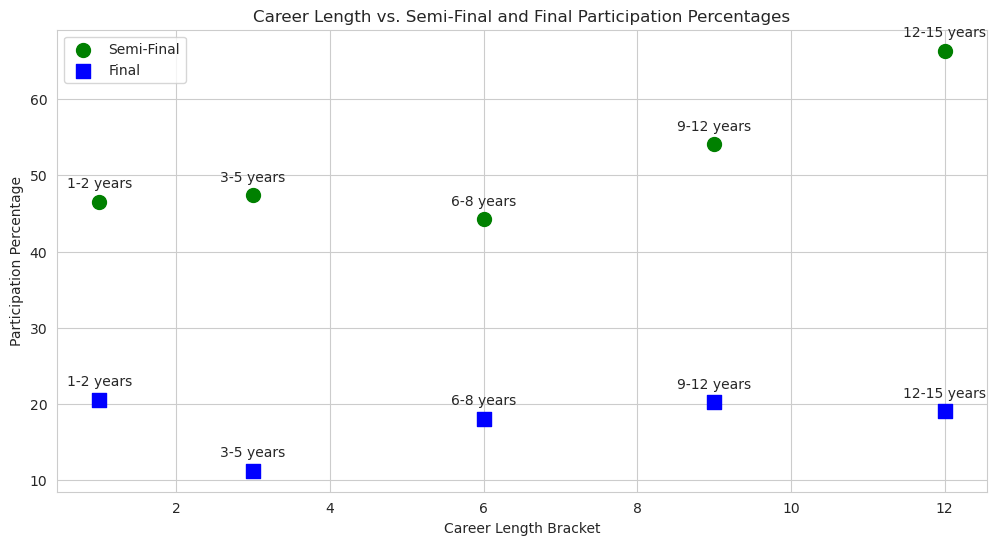

In [171]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'semi final percentage' and 'final percentage' to strings if they are not already
if athlete_stats['semi final percentage'].dtype != 'object':
    athlete_stats['semi final percentage'] = athlete_stats['semi final percentage'].astype(str)
if athlete_stats['final percentage'].dtype != 'object':
    athlete_stats['final percentage'] = athlete_stats['final percentage'].astype(str)

# Remove percentage signs and convert to numeric
athlete_stats['semi final percentage'] = pd.to_numeric(athlete_stats['semi final percentage'].str.replace('%', ''), errors='coerce')
athlete_stats['final percentage'] = pd.to_numeric(athlete_stats['final percentage'].str.replace('%', ''), errors='coerce')

# Group by career length and calculate the average percentages
grouped_data = athlete_stats.groupby('career length').mean(numeric_only=True)[['semi final percentage', 'final percentage']].reset_index()

# Extract the numeric value from the 'career length' for plotting
grouped_data['years_numeric'] = grouped_data['career length'].str.extract(r'(\d+)').astype(int)

# Create a side-by-side scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(grouped_data['years_numeric'], grouped_data['semi final percentage'], s=100, c='g', marker='o', label='Semi-Final')
plt.scatter(grouped_data['years_numeric'], grouped_data['final percentage'], s=100, c='b', marker='s', label='Final')

# Customize the plot
plt.title('Career Length vs. Semi-Final and Final Participation Percentages')
plt.xlabel('Career Length Bracket')
plt.ylabel('Participation Percentage')
plt.grid(True)
plt.legend()

# Annotate data points with career length labels
for i, row in grouped_data.iterrows():
    plt.annotate(row['career length'], (row['years_numeric'], row['semi final percentage']), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(row['career length'], (row['years_numeric'], row['final percentage']), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.show()

In this graph we have the participation percentage in the x axis and the corresponding career length bracket in the y axis. 

Key findings from these results:

- Individuals with a career length of "12-15 years" have the highest average success rate in semifinals, with approximately 66.35%.
However, they have a relatively lower average success rate in finals, at approximately 19.09%.
- Individuals with a career length of "3-5 years" have a relatively low average success rate in both semifinals and finals.
- Those with a career length of "9-12 years" have a relatively high average success rate in finals compared to others, at approximately 20.21%.
- The "1-2 years" and "6-8 years" career length categories have varying success rates in both semifinals and finals, with no clear trend.

To get a detailed view, I ran the code just to be sure of the numeric percentages:

In [172]:
# same outcome without visualization
import pandas as pd

# Convert 'semi final percentage' and 'final percentage' to strings if they are not already
if athlete_stats['semi final percentage'].dtype != 'object':
    athlete_stats['semi final percentage'] = athlete_stats['semi final percentage'].astype(str)
if athlete_stats['final percentage'].dtype != 'object':
    athlete_stats['final percentage'] = athlete_stats['final percentage'].astype(str)

# Remove percentage signs and convert to numeric
athlete_stats['semi final percentage'] = pd.to_numeric(athlete_stats['semi final percentage'].str.replace('%', ''), errors='coerce')
athlete_stats['final percentage'] = pd.to_numeric(athlete_stats['final percentage'].str.replace('%', ''), errors='coerce')

# Group by career length and calculate the average percentages
grouped_data = athlete_stats.groupby('career length').mean(numeric_only=True)[['semi final percentage', 'final percentage']].reset_index()

# Display the grouped data
grouped_data

career length  semi final percentage  final percentage
0     1-2 years              46.540000         20.565385
1   12-15 years              66.354000         19.090000
2     3-5 years              47.389091         11.229091
3     6-8 years              44.217000         18.052000
4    9-12 years              54.081111         20.208889

Moving on. 

To see how well they climbed in their whole career when they got to finals, it started to seem logical to create variables to see how often they ended up in Podium, Extended Podium (top 5 spots), 1st, 2nd, 3rd, 4th and 5th individually. 
To do so, I had to re-use my df_boulder and check the top 5 athletes for each competition. Then, refocus and only keep the data for the 48 climbers in this DF nº2. 

This could be the one, it seems logical than checking who made podiums should be able to tell me if they will get a podium again, right? 


In [173]:
# Perfect score for comparison
perfect_score = 8  # 4 tops and 4 zones

# Calculate score and select top 5 athletes for each competition in finals
top_athletes = (
    df_boulder[df_boulder['level'] == 'F']
    .assign(
        score=lambda x: perfect_score - x[['top1', 'zone1', 'top2', 'zone2', 'top3', 'zone3', 'top4', 'zone4']].sum(axis=1)
    )
    .sort_values(by=['competition', 'score'])
    .groupby('competition').head(5)
    .assign(
        position=lambda x: x.groupby('competition').cumcount() + 1
    )
)

# Map index numbers to positions
position_map = {1: '1st', 2: '2nd', 3: '3rd', 4: '4th', 5: '5th'}
top_athletes['position'] = top_athletes['position'].map(position_map)

# Selecting required columns
columns = ['competition', 'name', 'country', 'position', 'top1', 'zone1', 'top2', 'zone2', 'top3', 'zone3', 'top4', 'zone4']
top_athletes = top_athletes[columns]

# Displaying the result
top_athletes

competition             name  \
9340  Boulder & Lead IFSC World Championships Bern 2...   janja garnbret   
9341  Boulder & Lead IFSC World Championships Bern 2...  brooke raboutou   
9342  Boulder & Lead IFSC World Championships Bern 2...     jessica pilz   
9343  Boulder & Lead IFSC World Championships Bern 2...   oriane bertone   
9344  Boulder & Lead IFSC World Championships Bern 2...      miho nonaka   
...                                                 ...              ...   
6981  Lead • Speed • Boulder • Combined IFSC Europe ...       stasa gejo   
6982  Lead • Speed • Boulder • Combined IFSC Europe ...    lucia dörffel   
6983  Lead • Speed • Boulder • Combined IFSC Europe ...   alma bestvater   
6984  Lead • Speed • Boulder • Combined IFSC Europe ...       afra hönig   
6980  Lead • Speed • Boulder • Combined IFSC Europe ...    chloe caulier   

     country position  top1  zone1  top2  zone2  top3  zone3  top4  zone4  
9340     SLO      1st   1.0    1.0   2.0    1.0   1.0    1.0   inf    1.0  
9341     USA      2nd   1.0    1.0   2.0    2.0   inf    1.0   inf    2.0  
9342     AUT      3rd   2.0    1.0   4.0    4.0   inf    1.0   inf    7.0  
9343     FRA      4th   inf    2.0   3.0    2.0   inf    1.0   inf    1.0  
9344     JPN      5th   inf    3.0   inf    1.0   inf    4.0   2.0    1.0  
...      ...      ...   ...    ...   ...    ...   ...    ...   ...    ...  
6981     SRB      1st   inf    1.0   1.0    1.0   inf    1.0   3.0    1.0  
6982     GER      2nd   2.0    1.0   1.0    1.0   inf    1.0   inf    inf  
6983     GER      3rd   2.0    1.0   inf    1.0   inf    1.0   inf    6.0  
6984     GER      4th   inf    1.0   4.0    1.0   inf    2.0   inf    inf  
6980     BEL      5th   1.0    1.0   1.0    1.0   1.0    1.0   3.0    3.0  

[620 rows x 12 columns]

Now that we have this list, let's just keep the variable with the results for the 48 qualified climbers. 

In [174]:
# List of 48 qualified climbers
selected_climbers = [
    "brooke raboutou", "miho nonaka", "chaehyun seo", "jain kim", "vita lukan",
    "mia krampl", "anastasia sanders", "futaba ito", "nonoha kume", "hélène janicot",
    "manon hily", "ayala kerem", "hannah meul", "stasa gejo", "molly thompson-smith",
    "fanny gibert", "laura rogora", "zhilu luo", "ryu nakagawa", "zélia avezou",
    "ievgeniia kazbekova", "eliska adamovska", "sara copar", "camilla moroni",
    "lucka rakovec", "kyra condie", "lynn van der meer", "lucia dörffel", "giorgia tesio",
    "petra klingler", "noa shiran", "roxana wienand", "elnaz rekabi", "franziska sterrer",
    "yejoo seo", "erin mcneice", "aleksandra totkova", "sandra hopfensitz", "alannah yip",
    "michaela smetanova", "maya stasiuk", "kylie cullen", "martina buršíková",
    "valentina aguado", "sol sa", "chloe caulier", "tegwen oates", "svana bjarnason"
]

# Filter top_athletes to include only the selected climbers, using lowercase for matching
top_selected_climbers = top_athletes[top_athletes['name'].str.lower().isin([c.lower() for c in selected_climbers])]

# Displaying the result
top_selected_climbers

competition             name  \
9341  Boulder & Lead IFSC World Championships Bern 2...  brooke raboutou   
9344  Boulder & Lead IFSC World Championships Bern 2...      miho nonaka   
9191        Boulder FSC Asian Cup Riyadh 2023 12-16 Dec     elnaz rekabi   
8251  Boulder IFSC - Climbing World Cup (B&L) - Mori...      miho nonaka   
8252  Boulder IFSC - Climbing World Cup (B&L) - Mori...     chaehyun seo   
...                                                 ...              ...   
7456  Lead • Speed • Boulder • Combined IFSC - Climb...  brooke raboutou   
7453  Lead • Speed • Boulder • Combined IFSC - Climb...   camilla moroni   
6981  Lead • Speed • Boulder • Combined IFSC Europe ...       stasa gejo   
6982  Lead • Speed • Boulder • Combined IFSC Europe ...    lucia dörffel   
6980  Lead • Speed • Boulder • Combined IFSC Europe ...    chloe caulier   

     country position  top1  zone1  top2  zone2  top3  zone3  top4  zone4  
9341     USA      2nd   1.0    1.0   2.0    2.0   inf    1.0   inf    2.0  
9344     JPN      5th   inf    3.0   inf    1.0   inf    4.0   2.0    1.0  
9191     IRI      2nd   2.0    2.0   inf    1.0   2.0    2.0   inf    1.0  
8251     JPN      1st   inf    1.0   1.0    1.0   2.0    1.0   inf    1.0  
8252     KOR      2nd   3.0    2.0   inf    inf   1.0    1.0   inf    1.0  
...      ...      ...   ...    ...   ...    ...   ...    ...   ...    ...  
7456     USA      3rd   2.0    1.0   1.0    1.0   inf    inf   inf    2.0  
7453     ITA      5th   3.0    1.0   1.0    1.0   7.0    7.0   2.0    2.0  
6981     SRB      1st   inf    1.0   1.0    1.0   inf    1.0   3.0    1.0  
6982     GER      2nd   2.0    1.0   1.0    1.0   inf    1.0   inf    inf  
6980     BEL      5th   1.0    1.0   1.0    1.0   1.0    1.0   3.0    3.0  

[181 rows x 12 columns]

In [175]:
# Saving it as a CSV file
top_selected_climbers.to_csv('top_selected_climbers.csv', index=False)

Now that we have this new variable, let's add the columns Podium, 1st, 2nd, 3rd, 4th and 5th to see how often any of the qualified athletes got any of those spots in competitions before. We will also include the variable I mentioned above, that I decided to call 'Extended Podium', this variable will show how often an athletes ended up in the top 5 positions. Note that in finals, usually there are 8 to 6 competitors only. 

In [176]:
import pandas as pd
from itables import init_notebook_mode

init_notebook_mode(all_interactive=False)

# Function to calculate career length category
def calculate_career_length(min_year, max_year):
    career_length_years = max_year - min_year + 1
    if career_length_years <= 2:
        return '1-2 years'
    elif career_length_years <= 5:
        return '3-5 years'
    elif career_length_years <= 8:
        return '6-8 years'
    elif career_length_years <= 12:
        return '9-12 years'
    else:
        return '12+ years'

# Function to calculate basic performance statistics, career length, and competition experience
def athlete_statistics(df):
    min_year = df['year'].min()
    max_year = df['year'].max()
    qualification_count = (df['level'] == 'Q').sum()
    semi_final_count = (df['level'] == 'S').sum()
    final_count = (df['level'] == 'F').sum()
    semi_final_percentage = (semi_final_count / qualification_count * 100) if qualification_count > 0 else 0
    final_percentage = (final_count / qualification_count * 100) if qualification_count > 0 else 0
    competition_experience = df['competition'].nunique()  # Count of unique competitions

    return pd.Series({
        'qualification participations': qualification_count,
        'semi-final participations': semi_final_count,
        'final participations': final_count,
        'semi-final percentage': f"{semi_final_percentage:.2f}%",
        'final percentage': f"{final_percentage:.2f}%",
        'active years': f"{min_year}-{max_year}",
        'career length': calculate_career_length(min_year, max_year),
        'competition experience': competition_experience,  
        'country': df['country'].iloc[0]  
    })

# Calculate basic performance statistics for each athlete
athlete_stats = df_qualified.groupby('name').apply(athlete_statistics)

# Count placements including podiums and extended podiums (top 5 positions)
placements = top_selected_climbers.groupby('name')['position'].value_counts().unstack(fill_value=0)
placements['podiums'] = placements[['1st', '2nd', '3rd']].sum(axis=1)
placements['extended podiums'] = placements[['1st', '2nd', '3rd', '4th', '5th']].sum(axis=1)
placements = placements[['podiums', 'extended podiums', '1st', '2nd', '3rd', '4th', '5th']].astype(int)

# Merge placements with athlete_stats
athlete_stats_with_placements = athlete_stats.merge(placements, left_index=True, right_index=True, how='left').fillna(0)

# Reorder columns to include the new 'competition experience' column
columns_order = ['country', 'active years', 'career length', 'competition experience',
                 'qualification participations', 'semi-final participations', 'final participations',
                 'semi-final percentage', 'final percentage', 'podiums', 'extended podiums',
                 '1st', '2nd', '3rd', '4th', '5th']
athlete_stats_with_placements = athlete_stats_with_placements.reindex(columns=columns_order).reset_index().rename(columns={'index': 'name'})

# Display the updated DataFrame
athlete_stats_with_placements

<IPython.core.display.Javascript object>

name country active years career length  \
0            alannah yip     CAN    2011-2023     12+ years   
1     aleksandra totkova     BUL    2022-2023     1-2 years   
2      anastasia sanders     USA    2023-2023     1-2 years   
3            ayala kerem     ISR    2020-2023     3-5 years   
4        brooke raboutou     USA    2017-2023     6-8 years   
5         camilla moroni     ITA    2019-2023     3-5 years   
6           chaehyun seo     KOR    2019-2023     3-5 years   
7          chloe caulier     BEL    2012-2023    9-12 years   
8       eliska adamovska     CZE    2019-2023     3-5 years   
9           elnaz rekabi     IRI    2014-2023    9-12 years   
10          erin mcneice     GBR    2022-2023     1-2 years   
11          fanny gibert     FRA    2011-2023     12+ years   
12     franziska sterrer     AUT    2015-2023    9-12 years   
13            futaba ito     JPN    2018-2023     6-8 years   
14         giorgia tesio     ITA    2016-2023     6-8 years   
15           hannah meul     GER    2017-2023     6-8 years   
16        hélène janicot     FRA    2013-2023    9-12 years   
17   ievgeniia kazbekova     UKR    2012-2023    9-12 years   
18              jain kim     KOR    2008-2023     12+ years   
19          kylie cullen     USA    2021-2023     3-5 years   
20           kyra condie     USA    2013-2023    9-12 years   
21          laura rogora     ITA    2019-2023     3-5 years   
22         lucia dörffel     GER    2016-2023     6-8 years   
23         lucka rakovec     SLO    2019-2023     3-5 years   
24     lynn van der meer     NED    2021-2023     3-5 years   
25            manon hily     FRA    2014-2023    9-12 years   
26     martina buršíková     SVK    2023-2023     1-2 years   
27          maya stasiuk     AUS    2023-2023     1-2 years   
28            mia krampl     SLO    2018-2023     6-8 years   
29    michaela smetanova     CZE    2019-2023     3-5 years   
30           miho nonaka     JPN    2014-2023    9-12 years   
31  molly thompson-smith     GBR    2017-2023     6-8 years   
32            noa shiran     ISR    2020-2023     3-5 years   
33           nonoha kume     JPN    2023-2023     1-2 years   
34        petra klingler     SUI    2009-2023     12+ years   
35        roxana wienand     GER    2017-2023     6-8 years   
36          ryu nakagawa     JPN    2021-2023     3-5 years   
37     sandra hopfensitz     GER    2022-2023     1-2 years   
38            sara copar     SLO    2022-2023     1-2 years   
39                sol sa     KOR    2011-2023     12+ years   
40            stasa gejo     SRB    2013-2023    9-12 years   
41       svana bjarnason     ISL    2023-2023     1-2 years   
42          tegwen oates     RSA    2023-2023     1-2 years   
43      valentina aguado     ARG    2017-2023     6-8 years   
44            vita lukan     SLO    2017-2023     6-8 years   
45             yejoo seo     KOR    2022-2023     1-2 years   
46             zhilu luo     CHN    2022-2023     1-2 years   
47          zélia avezou     FRA    2022-2023     1-2 years   

    competition experience  qualification participations  \
0                       40                            40   
1                       12                            13   
2                        9                             7   
3                       20                            19   
4                       30                            27   
5                       22                            21   
6                       20                            18   
7                       58                            59   
8                       11                            12   
9                       21                            20   
10                       8                             9   
11                      59                            60   
12                      35                            36   
13                      33                            32   
14                      23      

In [177]:
# Saving the DF
output_filename = 'athlete_stats_with_placements.xlsx'
athlete_stats_with_placements.to_excel(output_filename, index=False)

print(f'DataFrame exported to {output_filename}')

DataFrame exported to athlete_stats_with_placements.xlsx


Let's visualize the total podium finishes by each of our 48 climbers: 

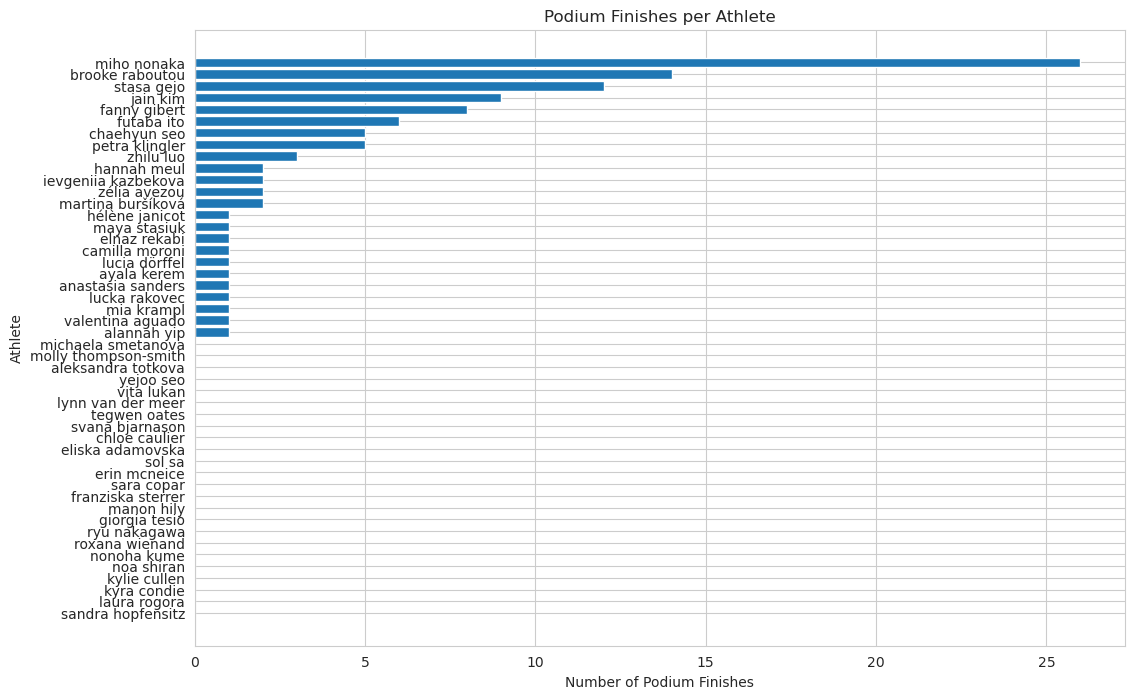

In [178]:
import matplotlib.pyplot as plt

# Sort the dataset by the number of podiums in descending order (from more to less)
sorted_data = athlete_stats_with_placements.sort_values(by='podiums', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(sorted_data['name'], sorted_data['podiums'])
plt.ylabel('Athlete')
plt.xlabel('Number of Podium Finishes')
plt.title('Podium Finishes per Athlete')
plt.show()

When I visualized the above values ordered by athletes names on y axis and number of podium finishes,  in x axis, I saw that a little less than half my climbers had made it finals in their career. 

I could of course see Top Performers: Athletes like Miho Nonaka, Fanny Gibert, and Petra Klingler have consistently performed well, achieving a significant number of podium finishes. They have secured 1st, 2nd, and 3rd place positions multiple times.
We should note Miho Nonaka stands out as one of the top-performing athletes in the dataset, with 26 podiums in total, a number considerably higher than most other athletes in the dataset.

I could see consistent results from athletes which have been climbing for 5+ year, with a presence on the podium, these are Brooke Raboutou, Stasa Gejo and Fanny Gibert for example.  

And I could also see emerging talent: some athletes, such as Ayala Kerem and Camilla Moroni, have started their careers recently and have already achieved podium finishes, showing potential for future success. 

Maybe checking top 3 (podium) is after all too limited. This would mean all the climbers below have zero chance of ending up getting a ticket to the olympic, so let's extend this podium!

Now let's see the Extended Podium Finishes only (1st to 5th spot).

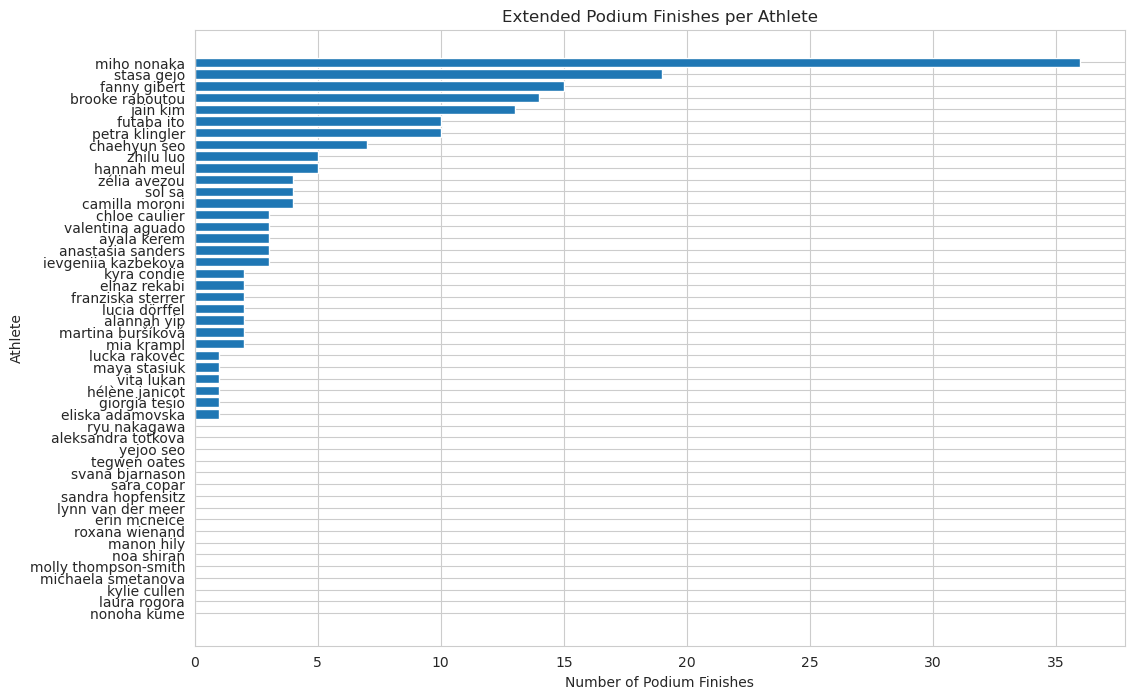

In [179]:
import matplotlib.pyplot as plt

# Sort the dataset by the number of podiums in descending order (from more to less)
sorted_data = athlete_stats_with_placements.sort_values(by='extended podiums', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(sorted_data['name'], sorted_data['extended podiums'])
plt.ylabel('Athlete')
plt.xlabel('Number of Podium Finishes')
plt.title('Extended Podium Finishes per Athlete')

plt.show()

Based on the podium results per athlete, here are some observations:
- Wow, Miho Nonaka, with 36 extended podium finishes, clearly stands out as the top performer. This high number indicates consistent high-level performance across competitions.
other conclusions I could get to is: 
there seems to be an Elite Group: Climbers like Stasa Gejo, Fanny Gibert, Brooke Raboutou, and Jain Kim, who have more than 10 extended podium finishes, represent an elite group. They are likely among the most competitive and successful in this group of athletes.
- Athletes with a high number of extended podiums but fewer actual podiums (1st to 3rd) might be very consistent performers who often reach the final rounds but don't always place in the very top positions due to stronger competitors, think Janja Garnbret for example. 
- It seems to me as athletes with lower extended podium numbers could be ones to watch for future growth, especially if they are newer to the competition circuit.
- This distribution of extended podiums can also give a sense of the competitive landscape.  Bouldering is a competitive  environment where many athletes have chances to excel and they do get to shine sometimes.

Since some athletes have never been in finals and ended up in the top 5 spots, the variable extended podium is not likely to be a reliable target to start making predictions. 

Could it be about how often they successfully top the climbs they are confronted with?

Yeah, that sounds good, let's go and calculate that!

Now let's check for patterns with a correlation matrix mixing the climber's statistics with placements: 

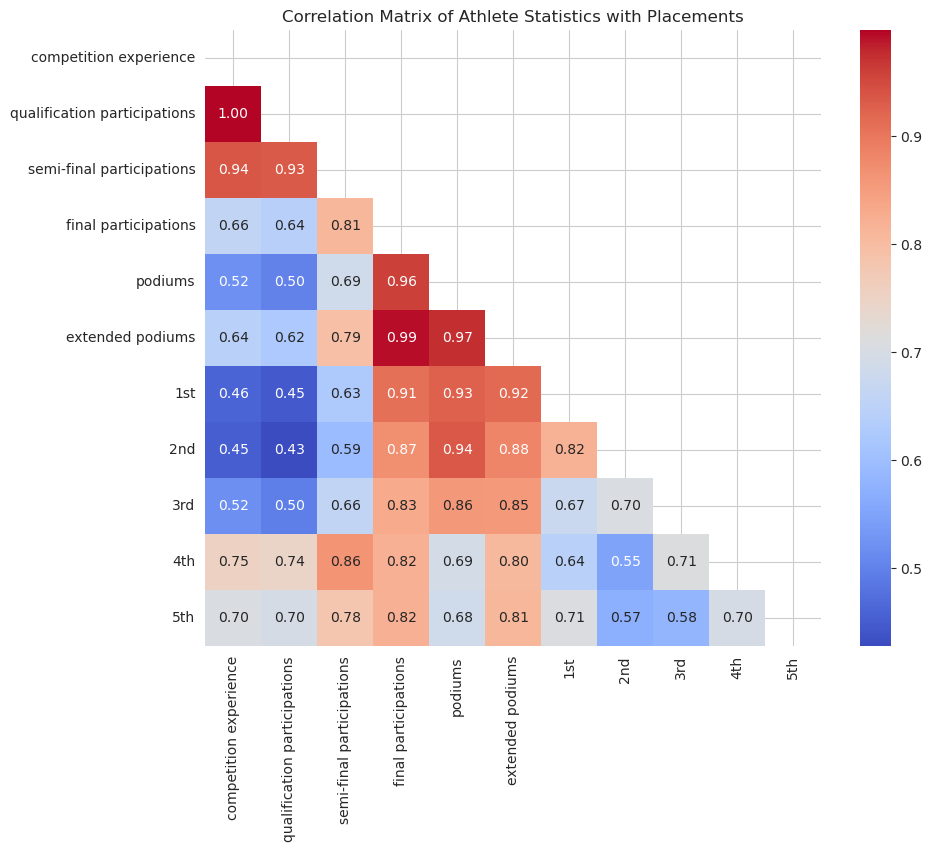

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation matrix, considering only numeric columns
corr = athlete_stats_with_placements.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Add title
plt.title('Correlation Matrix of Athlete Statistics with Placements')

# Show the plot
plt.show()

In [181]:
# same as before but without visualization 
# Calculate the correlation matrix, considering only numeric columns
corr = athlete_stats_with_placements.corr(numeric_only=True)

# Display the correlation matrix as a DataFrame
print(corr)

                              competition experience  \
competition experience                      1.000000   
qualification participations                0.998089   
semi-final participations                   0.937330   
final participations                        0.657441   
podiums                                     0.521215   
extended podiums                            0.641878   
1st                                         0.460961   
2nd                                         0.450752   
3rd                                         0.518543   
4th                                         0.751393   
5th                                         0.704647   

                              qualification participations  \
competition experience                            0.998089   
qualification participations                      1.000000   
semi-final participations                         0.931456   
final participations                              0.640036   
podiums          

The insights drawn from the correlation matrix focus on the relationships between various competition metrics. Here's a deeper analysis of the key insights:
- There's a nearly perfect correlation between competition experience and qualification participations. This suggests that the more competitions an individual or team enters, the more they engage in qualification rounds. It underscores the importance of consistent participation to gain experience and improve performance.

- There's a clear progression pattern where semi-final participations are strongly linked to final participations and further to podium finishes. This highlights a pathway of success where making it through to the later stages of a competition significantly increases the likelihood of achieving a top placement.

- The very strong correlation between final participations and podium finishes, including specific positions (1st, 2nd, 3rd), indicates that reaching the final is a critical factor in securing a top-three finish. This suggests that strategies focused on making it to the final can be very effective for competitors aiming for the podium.

- Extended podiums, likely indicating finishes within the top 5 or 6, show strong correlations with final participations and semi-final participations. This indicates that competitors who frequently make it to these stages are consistently performing well, even if they don't always make the top 3. It points to the value of consistency and high performance across multiple stages of competition.

- There's a notable correlation between competition experience and placements just outside the top 3 (4th and 5th). This could suggest that experience not only increases the chances of winning but also contributes to consistently high finishes. Competitors with more experience tend to perform well enough to place highly, even if they don't always win.

- The matrix suggests that success in competitions is multifaceted, involving not just winning but consistently reaching higher stages and achieving high placements. Strategies for success could therefore focus on consistent participation, aiming for progression through stages, and leveraging experience to improve performance.

- The strong correlations across various metrics indicate that success in competitions is interconnected; improvements in one area (like reaching semi-finals) are likely to be associated with improvements in others (like final participations and podium finishes).

In summary, the insights from the correlation matrix reveal the importance of experience, consistent participation, and the ability to progress through the stages of competition as key factors in achieving success. These insights can guide competitors in developing strategies that focus on long-term development, consistent performance, and strategic planning to reach and succeed in the final stages of competitions.

Nonetheless, since some athletes have never been in finals and ended up in the top 5 spots, the variable extended podium is not likely to be a reliable target to start making predictions. 

Since climbers are supposed to 'flash' the problems, meaning they finish one boulder problem in one try, their top percentage,  percentage of times they solved a boulder problem out of total number of attempt, could be a great indicator of future success, right? 

Let's calculate it !

In [182]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=False)

# Create a copy of the DataFrame to avoid modifying the original
df_qualified_copy = df_qualified.copy()

def calculate_successful_tops_and_attempts(row):
    successful_tops = 0
    total_attempts = 0

    for i in range(1, 7):  # Assuming up to 6 boulders
        top_column = f'top{i}'
        zone_column = f'zone{i}'

        # Check and count top attempts
        if pd.notnull(row[top_column]) and row[top_column] != float('inf'):
            successful_tops += 1
            total_attempts += row[top_column]  # Number of attempts from top column
        elif row[top_column] == float('inf'):
            # If top is 'inf', count the zone attempts or count as 1 if zone is also 'inf'
            total_attempts += row[zone_column] if pd.notnull(row[zone_column]) and row[zone_column] != float('inf') else 1

    return successful_tops, total_attempts

# Apply the function to each row and assign using .loc
calculated_values = df_qualified_copy.apply(calculate_successful_tops_and_attempts, axis=1, result_type='expand')
df_qualified_copy.loc[:, 'successful tops'] = calculated_values[0]
df_qualified_copy.loc[:, 'total attempts'] = calculated_values[1]

# Calculate Top Percentage, handling division by zero
df_qualified_copy['top percentage'] = (df_qualified_copy['successful tops'] / df_qualified_copy['total attempts']).fillna(0) * 100
df_qualified_copy['top percentage'] = df_qualified_copy['top percentage'].round(2)

# Create the career_tops_stats DataFrame by aggregating values for each climber's career
career_tops_stats = df_qualified_copy.groupby('name')[['successful tops', 'total attempts']].sum()
career_tops_stats['top percentage'] = (career_tops_stats['successful tops'] / career_tops_stats['total attempts']).fillna(0) * 100
career_tops_stats['top percentage'] = career_tops_stats['top percentage'].round(2)

# Calculate Average Attempts per Top
career_tops_stats['average attempts per top'] = (career_tops_stats['total attempts'] / career_tops_stats['successful tops']).fillna(0)
career_tops_stats['average attempts per top'] = career_tops_stats['average attempts per top'].round(2)

# Remove trailing .0 from all columns except 'top percentage'
career_tops_stats = career_tops_stats.applymap(lambda x: int(x) if x.is_integer() else round(x, 2) if not isinstance(x, str) else x)

# Display the career_tops_stats DataFrame using itables for interactive visualization
career_tops_stats

<IPython.core.display.Javascript object>

successful tops  total attempts  top percentage  \
name                                                                    
alannah yip                       114             547           20.84   
aleksandra totkova                 14             158            8.86   
anastasia sanders                  39             229           17.03   
ayala kerem                        95             438           21.69   
brooke raboutou                   168             589           28.52   
camilla moroni                    111             588           18.88   
chaehyun seo                       98             387           25.32   
chloe caulier                     208             884           23.53   
eliska adamovska                   20             190           10.53   
elnaz rekabi                       68             325           20.92   
erin mcneice                       22             139           15.83   
fanny gibert                      319            1093           29.19   
franziska sterrer                 111             625           17.76   
futaba ito                        192             690           27.83   
giorgia tesio                      68             359           18.94   
hannah meul                       107             440           24.32   
hélène janicot                     24              97           24.74   
ievgeniia kazbekova               127             523           24.28   
jain kim                          197             735           26.80   
kylie cullen                       52             292           17.81   
kyra condie                        96             527           18.22   
laura rogora                       67             380           17.63   
lucia dörffel                      57             298           19.13   
lucka rakovec                      47             244           19.26   
lynn van der meer                   7              60           11.67   
manon hily                         34             207           16.43   
martina buršíková                  25              98           25.51   
maya stasiuk                       10              64           15.62   
mia krampl                         54             325           16.62   
michaela smetanova                  4              81            4.94   
miho nonaka                       462            1255           36.81   
molly thompson-smith               14             161            8.70   
noa shiran                         21             116           18.10   
nonoha kume                        15              56           26.79   
petra klingler                    339            1233           27.49   
roxana wienand                     41             276           14.86   
ryu nakagawa                       31             178           17.42   
sandra hopfensitz                  18             121           14.88   
sara copar                         13              91           14.29   
sol sa                            223            1003           22.23   
stasa gejo                        249             844           29.50   
svana bjarnason                     1              29            3.45   
tegwen oates                        2              24            8.33   
valentina aguado                   55             287           19.16   
vita lukan                         59             336           17.56   
yejoo seo                           9              90           10.00   
zhilu luo                          70             268           26.12   
zélia avezou                       53             207           25.60   

                      average attempts per top  
name                                            
alannah yip                               4.80  
aleksandra totkova                       11.29  
anastasia sanders                         5.87  
ayala kerem                               4.61  
brooke raboutou                           3.51  
camilla moroni              

In [183]:
# Reset the index and set 'name' as the index column
career_tops_stats.reset_index(inplace=True)

# Save the DataFrame with 'name' as the first column
career_tops_stats = career_tops_stats[['name', 'successful tops', 'total attempts', 'top percentage', 'average attempts per top']]

In [184]:
# Saving the DataFrame as a CSV file
career_tops_stats.to_csv('career_tops_stats.csv', index=False)

Now that we have the results and they are saved, let's visualize their correlation:

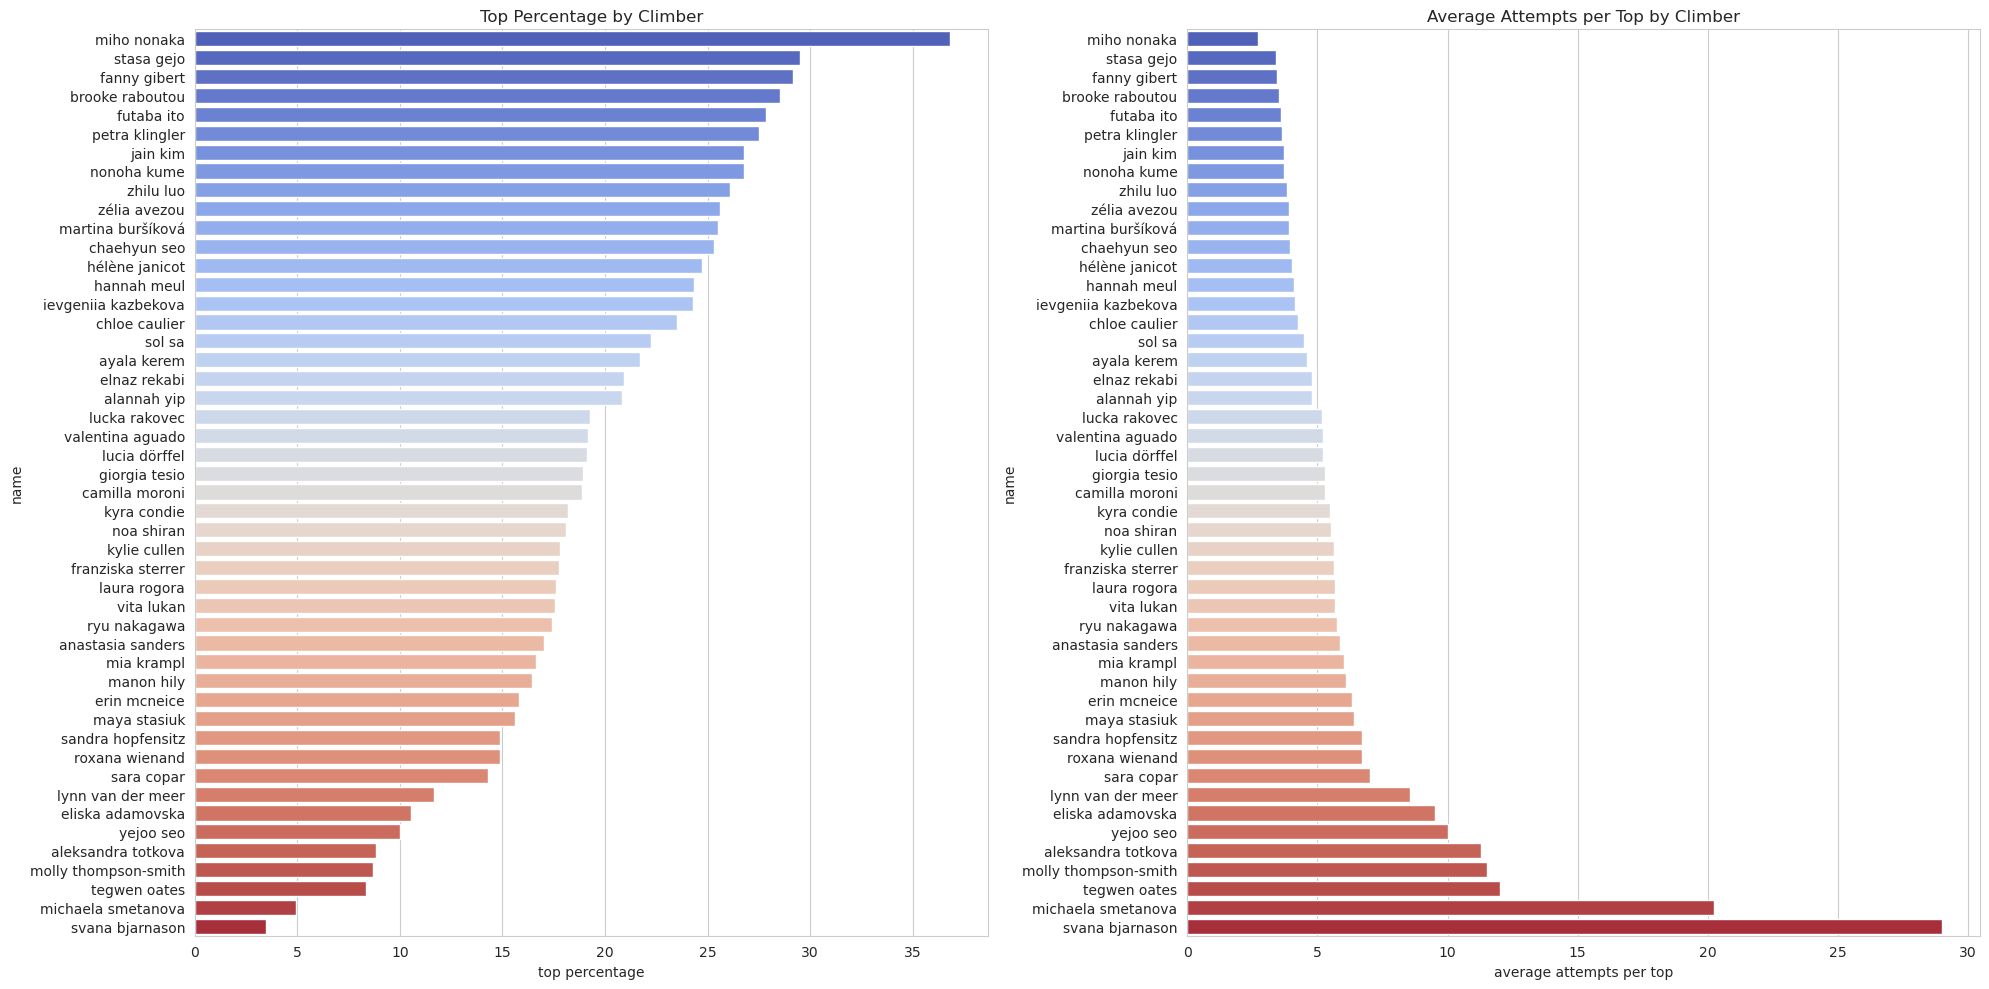

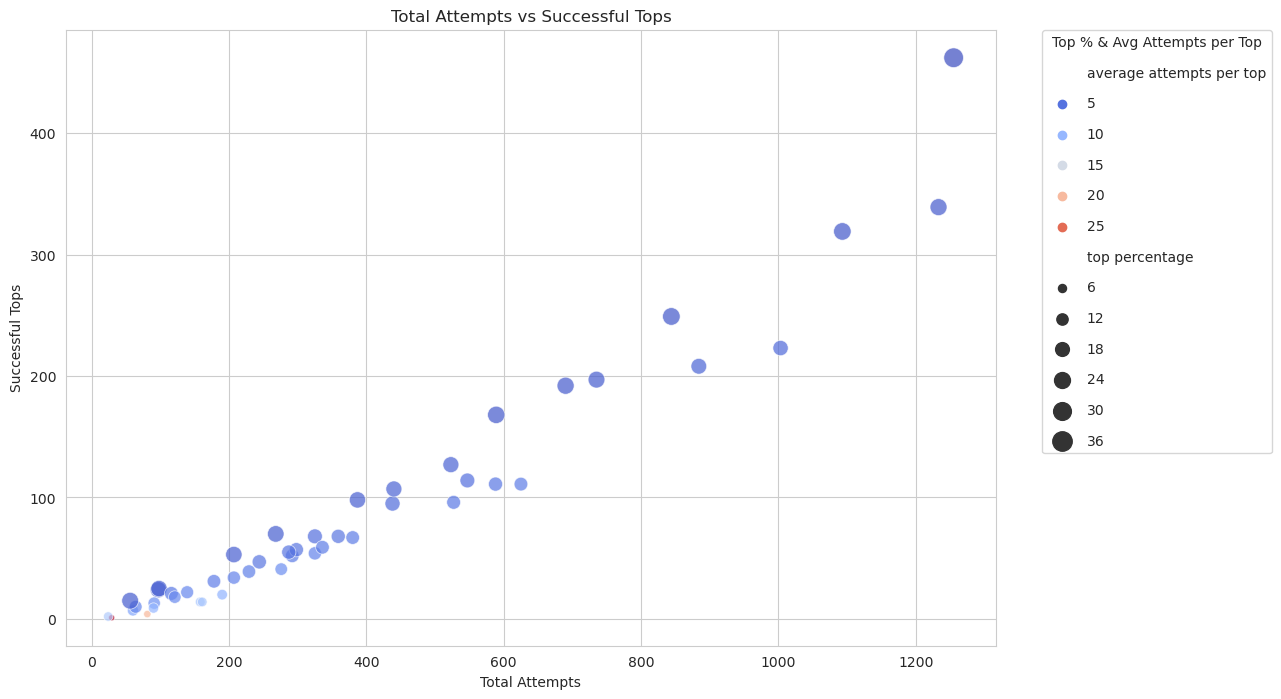

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
file_path = '/home/sole/Documents/DS/Projecte Final/career_tops_stats.csv'  
career_tops_stats = pd.read_csv(file_path)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the bar charts for Top Percentage and Average Attempts per Top
plt.figure(figsize=(20, 10))

# Bar Chart for Top Percentage
plt.subplot(1, 2, 1)
sns.barplot(x='top percentage', y='name', data=career_tops_stats.sort_values('top percentage', ascending=False), palette='coolwarm')
plt.title('Top Percentage by Climber')

# Bar Chart for Average Attempts per Top
plt.subplot(1, 2, 2)
sns.barplot(x='average attempts per top', y='name', data=career_tops_stats.sort_values('average attempts per top'), palette='coolwarm')
plt.title('Average Attempts per Top by Climber')

plt.tight_layout()
plt.show()

# Plotting the scatter plot for Total Attempts vs Successful Tops
plt.figure(figsize=(12, 8))
sns.scatterplot(data=career_tops_stats, x='total attempts', y='successful tops', size='top percentage', hue='average attempts per top', palette='coolwarm', sizes=(20, 200), alpha=0.7)
plt.title('Total Attempts vs Successful Tops')
plt.xlabel('Total Attempts')
plt.ylabel('Successful Tops')
plt.legend(title='Top % & Avg Attempts per Top', labelspacing=1.2, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()

Some key findings:
- Miho Nonaka stands out with the highest top percentage (36.81%), indicating she has a high success rate compared to her peers. This suggests exceptional performance efficiency or perhaps a stronger ability to complete climbs successfully on the first try.
- The "Average Attempts per Top" metric provides insight into how efficiently climbers are achieving their tops. A lower value here indicates higher efficiency. Miho Nonaka again excels with an average of only 2.72 attempts per top, underscoring her efficiency in successful climbs.
- By comparing the "Top Percentage" and "Average Attempts per Top," we can identify climbers who might not have the highest success rate but are highly efficient when they do succeed. For example, Fanny Gibert has a top percentage of 29.19% and an average attempts per top of 3.43, indicating she's also a highly efficient climber despite having a lower top percentage than Nonaka.
- Climbers with a high "Average Attempts per Top," such as Michaela Smetanova (20.25 attempts per top) and Svana Bjarnason (29.00 attempts per top), might be facing more challenges in achieving successful tops.
- The data allows for the identification of emerging talents (climbers with fewer attempts but high success rates) and established competitors (climbers with a large volume of attempts and consistent success rates). For instance, climbers like Alannah Yip and Brooke Raboutou have a high number of total attempts, suggesting they are likely more experienced competitors, with Raboutou showing a particularly high top percentage of 28.52%.
- These are strategic insights: Coaches and climbers can use this data for strategic insights, such as focusing on improving efficiency or consistency. For climbers with lower top percentages, it might be beneficial to work on technique or physical conditioning. For those with high average attempts per top, focusing on mental preparation and strategy might help reduce the number of attempts needed for a successful top.

Let's merge the dataframes about the athletes statistics and placements with their tops statistics into one DF.  

In [186]:
# Merge the DataFrames on the 'name' column
df_climbers_full_stats = athlete_stats_with_placements.merge(career_tops_stats, on='name', how='left')

# Fill NaN values with 0 (or an appropriate value)
df_climbers_full_stats.fillna(0, inplace=True)

# Reorder columns if needed
# Specify the desired column order in a list
desired_column_order = ['name', 'country', 'active years', 'career length', 'qualification participations', 'semi-final participations', 'final participations', 'semi-final percentage',
'final percentage', 'podiums', 'extended podiums', '1st', '2nd', '3rd', '4th', '5th','successful tops', 'total attempts', 'top percentage', 'average attempts per top']

# Apply the new order to the DataFrame
df_climbers_full_stats = df_climbers_full_stats[desired_column_order]

# Display the combined DataFrame
df_climbers_full_stats

name country active years career length  \
0            alannah yip     CAN    2011-2023     12+ years   
1     aleksandra totkova     BUL    2022-2023     1-2 years   
2      anastasia sanders     USA    2023-2023     1-2 years   
3            ayala kerem     ISR    2020-2023     3-5 years   
4        brooke raboutou     USA    2017-2023     6-8 years   
5         camilla moroni     ITA    2019-2023     3-5 years   
6           chaehyun seo     KOR    2019-2023     3-5 years   
7          chloe caulier     BEL    2012-2023    9-12 years   
8       eliska adamovska     CZE    2019-2023     3-5 years   
9           elnaz rekabi     IRI    2014-2023    9-12 years   
10          erin mcneice     GBR    2022-2023     1-2 years   
11          fanny gibert     FRA    2011-2023     12+ years   
12     franziska sterrer     AUT    2015-2023    9-12 years   
13            futaba ito     JPN    2018-2023     6-8 years   
14         giorgia tesio     ITA    2016-2023     6-8 years   
15           hannah meul     GER    2017-2023     6-8 years   
16        hélène janicot     FRA    2013-2023    9-12 years   
17   ievgeniia kazbekova     UKR    2012-2023    9-12 years   
18              jain kim     KOR    2008-2023     12+ years   
19          kylie cullen     USA    2021-2023     3-5 years   
20           kyra condie     USA    2013-2023    9-12 years   
21          laura rogora     ITA    2019-2023     3-5 years   
22         lucia dörffel     GER    2016-2023     6-8 years   
23         lucka rakovec     SLO    2019-2023     3-5 years   
24     lynn van der meer     NED    2021-2023     3-5 years   
25            manon hily     FRA    2014-2023    9-12 years   
26     martina buršíková     SVK    2023-2023     1-2 years   
27          maya stasiuk     AUS    2023-2023     1-2 years   
28            mia krampl     SLO    2018-2023     6-8 years   
29    michaela smetanova     CZE    2019-2023     3-5 years   
30           miho nonaka     JPN    2014-2023    9-12 years   
31  molly thompson-smith     GBR    2017-2023     6-8 years   
32            noa shiran     ISR    2020-2023     3-5 years   
33           nonoha kume     JPN    2023-2023     1-2 years   
34        petra klingler     SUI    2009-2023     12+ years   
35        roxana wienand     GER    2017-2023     6-8 years   
36          ryu nakagawa     JPN    2021-2023     3-5 years   
37     sandra hopfensitz     GER    2022-2023     1-2 years   
38            sara copar     SLO    2022-2023     1-2 years   
39                sol sa     KOR    2011-2023     12+ years   
40            stasa gejo     SRB    2013-2023    9-12 years   
41       svana bjarnason     ISL    2023-2023     1-2 years   
42          tegwen oates     RSA    2023-2023     1-2 years   
43      valentina aguado     ARG    2017-2023     6-8 years   
44            vita lukan     SLO    2017-2023     6-8 years   
45             yejoo seo     KOR    2022-2023     1-2 years   
46             zhilu luo     CHN    2022-2023     1-2 years   
47          zélia avezou     FRA    2022-2023     1-2 years   

    qualification participations  semi-final participations  \
0                             40                         20   
1                             13                          0   
2                              7                          6   
3                             19                         15   
4                             27                         19   
5                             21                         17   
6                             18                         15   
7                             59                         28   
8                             12                          2   
9                             20                          9   
10                             9                          2   
11                            60                         44   
12                            36                         18   
13                            32                  

In [187]:
# Saving it as a CSV file
df_climbers_full_stats.to_csv('df_climbers_full_stats.csv', index=False)

When I got to this point, I started to think that maybe checking their whole climbing career numbers is not that important, after all, they are going to be competing in 2024, so more recent could be more relevant. 

To get all the 2023 stats, I followed the same structure as for all the variables I created for their whole careers and filtered to get only their 2023 results. 

I even went one step further and created a recent performance score, more on that lower. 

In [2]:
import pandas as pd

# path to the file
xlsx_path = '/home/sole/Documents/DS/Projecte Final/Projecte Final (ENG)/Saved DFS/Boulder_Women_2023.xlsx'

# Import the XLSX file into a DataFrame (df_boulder)
df_boulder_2023 = pd.read_excel(xlsx_path)

# Display the DataFrame
print(df_boulder_2023)

      year discipline                                        competition  \
0     2023    Boulder    Boulder IFSC European Cup Chambéry 2023 7-8 Apr   
1     2023    Boulder    Boulder IFSC European Cup Chambéry 2023 7-8 Apr   
2     2023    Boulder    Boulder IFSC European Cup Chambéry 2023 7-8 Apr   
3     2023    Boulder    Boulder IFSC European Cup Chambéry 2023 7-8 Apr   
4     2023    Boulder    Boulder IFSC European Cup Chambéry 2023 7-8 Apr   
...    ...        ...                                                ...   
1466  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
1467  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
1468  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
1469  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
1470  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   

     gender level   group                  name country top1 zone1 top2 zone2  \
0     

In [3]:
import pandas as pd

# Convert specified columns to float64
columns_to_convert = ['top1', 'zone1', 'top2', 'zone2', 'top3', 'zone3', 'top4', 'zone4']
df_boulder_2023[columns_to_convert] = df_boulder_2023[columns_to_convert].astype('float64')

# Verify the changes
print(df_boulder_2023.dtypes)

year             int64
discipline      object
competition     object
gender          object
level           object
group           object
name            object
country         object
top1           float64
zone1          float64
top2           float64
zone2          float64
top3           float64
zone3          float64
top4           float64
zone4          float64
top5           float64
zone5          float64
top6           float64
zone6          float64
dtype: object


In [4]:
# List of athletes to filter
athletes = [
    "brooke raboutou", "miho nonaka", "chaehyun seo", "jain kim", "vita lukan",
    "mia krampl", "anastasia sanders", "futaba ito", "nonoha kume", "hélène janicot",
    "manon hily", "ayala kerem", "hannah meul", "stasa gejo", "molly thompson-smith",
    "fanny gibert", "laura rogora", "zhilu luo", "ryu nakagawa", "zélia avezou",
    "ievgeniia kazbekova", "eliska adamovska", "sara copar", "camilla moroni",
    "lucka rakovec", "kyra condie", "lynn van der meer", "lucia dörffel", "giorgia tesio",
    "petra klingler", "noa shiran", "roxana wienand", "elnaz rekabi", "franziska sterrer",
    "yejoo seo", "erin mcneice", "aleksandra totkova", "sandra hopfensitz", "alannah yip",
    "michaela smetanova", "maya stasiuk", "kylie cullen", "martina buršíková",
    "valentina aguado", "sol sa", "chloe caulier", "tegwen oates", "svana bjarnason"
]

# Filter the DataFrame for these athletes
df_qualified_2023 = df_boulder_2023[df_boulder_2023['name'].str.lower().isin(athletes)]

# Filtering the DataFrame to include only rows for the year 2023
df_qualified_2023 = df_boulder_2023[df_boulder_2023['year'] == 2023]

# Rename all columns to include '2023' in their titles
df_qualified_2023 = df_qualified_2023.rename(columns=lambda x: f"{x} in 2023")

# Optional: Save the filtered data to a new Excel file
df_qualified_2023.to_excel('df_qualified_2023.xlsx', index=False)

# Display all the data for the filtered athletes
print(df_qualified_2023)

      year in 2023 discipline in 2023  \
0             2023            Boulder   
1             2023            Boulder   
2             2023            Boulder   
3             2023            Boulder   
4             2023            Boulder   
...            ...                ...   
1466          2023            Boulder   
1467          2023            Boulder   
1468          2023            Boulder   
1469          2023            Boulder   
1470          2023            Boulder   

                                    competition in 2023 gender in 2023  \
0       Boulder IFSC European Cup Chambéry 2023 7-8 Apr              W   
1       Boulder IFSC European Cup Chambéry 2023 7-8 Apr              W   
2       Boulder IFSC European Cup Chambéry 2023 7-8 Apr              W   
3       Boulder IFSC European Cup Chambéry 2023 7-8 Apr              W   
4       Boulder IFSC European Cup Chambéry 2023 7-8 Apr              W   
...                                                 ...        

let's go on and build their 2023 stats:

In [5]:
import pandas as pd
from itables import init_notebook_mode

# Initialize interactive tables mode for Jupyter Notebooks
init_notebook_mode(all_interactive=False)

# List of athletes for whom you want to calculate statistics
athletes = [
    "brooke raboutou", "miho nonaka", "chaehyun seo", "jain kim", "vita lukan",
    "mia krampl", "anastasia sanders", "futaba ito", "nonoha kume", "hélène janicot",
    "manon hily", "ayala kerem", "hannah meul", "stasa gejo", "molly thompson-smith",
    "fanny gibert", "laura rogora", "zhilu luo", "ryu nakagawa", "zélia avezou",
    "ievgeniia kazbekova", "eliska adamovska", "sara copar", "camilla moroni",
    "lucka rakovec", "kyra condie", "lynn van der meer", "lucia dörffel", "giorgia tesio",
    "petra klingler", "noa shiran", "roxana wienand", "elnaz rekabi", "franziska sterrer",
    "yejoo seo", "erin mcneice", "aleksandra totkova", "sandra hopfensitz", "alannah yip",
    "michaela smetanova", "maya stasiuk", "kylie cullen", "martina buršíková",
    "valentina aguado", "sol sa", "chloe caulier", "tegwen oates", "svana bjarnason"
]

# Filter the DataFrame to only include the specified athletes
df_filtered_2023 = df_qualified_2023[df_qualified_2023['name in 2023'].isin(athletes)]

# Function to calculate statistics for each athlete for 2023
def athlete_statistics_2023(df):
    qualification_count = (df['level in 2023'] == 'Q').sum()
    semi_final_count = (df['level in 2023'] == 'S').sum()
    final_count = (df['level in 2023'] == 'F').sum()

    # Ensure qualification count is at least equal to the highest of semi-final or final counts
    adjusted_qualification_count = max(qualification_count, semi_final_count, final_count)

    # Calculate percentages using adjusted qualification count
    semi_final_percentage = (semi_final_count / adjusted_qualification_count * 100) if adjusted_qualification_count > 0 else 0
    final_percentage = (final_count / adjusted_qualification_count * 100) if adjusted_qualification_count > 0 else 0

    return pd.Series({
        'country in 2023': df['country in 2023'].iloc[0],
        'qualification participations in 2023': adjusted_qualification_count,
        'semi final participations in 2023': semi_final_count,
        'final participations in 2023': final_count,
        'semi final percentage in 2023': f"{semi_final_percentage:.2f}%",
        'final percentage in 2023': f"{final_percentage:.2f}%"
    })

# Apply the function to calculate statistics for the filtered athletes
athlete_stats_2023 = df_filtered_2023.groupby('name in 2023').apply(athlete_statistics_2023)

# Reset index to make 'name in 2023' a column
athlete_stats_2023.reset_index(inplace=True)

# Reorder columns if needed
columns_order_2023 = ['name in 2023', 'country in 2023', 'qualification participations in 2023',
                      'semi final participations in 2023', 'final participations in 2023',
                      'semi final percentage in 2023', 'final percentage in 2023']
athlete_stats_2023 = athlete_stats_2023[columns_order_2023]

# Display the DataFrame
athlete_stats_2023

<IPython.core.display.Javascript object>

name in 2023 country in 2023  \
0            alannah yip             CAN   
1     aleksandra totkova             BUL   
2      anastasia sanders             USA   
3            ayala kerem             ISR   
4        brooke raboutou             USA   
5         camilla moroni             ITA   
6           chaehyun seo             KOR   
7          chloe caulier             BEL   
8       eliska adamovska             CZE   
9           elnaz rekabi             IRI   
10          erin mcneice             GBR   
11          fanny gibert             FRA   
12     franziska sterrer             AUT   
13            futaba ito             JPN   
14         giorgia tesio             ITA   
15           hannah meul             GER   
16        hélène janicot             FRA   
17   ievgeniia kazbekova             UKR   
18              jain kim             KOR   
19          kylie cullen             USA   
20           kyra condie             USA   
21          laura rogora             ITA   
22         lucia dörffel             GER   
23         lucka rakovec             SLO   
24     lynn van der meer             NED   
25            manon hily             FRA   
26     martina buršíková             SVK   
27          maya stasiuk             AUS   
28            mia krampl             SLO   
29    michaela smetanova             CZE   
30           miho nonaka             JPN   
31  molly thompson-smith             GBR   
32            noa shiran             ISR   
33           nonoha kume             JPN   
34        petra klingler             SUI   
35        roxana wienand             GER   
36          ryu nakagawa             JPN   
37     sandra hopfensitz             GER   
38            sara copar             SLO   
39                sol sa             KOR   
40            stasa gejo             SRB   
41       svana bjarnason             ISL   
42          tegwen oates             RSA   
43      valentina aguado             ARG   
44            vita lukan             SLO   
45             yejoo seo             KOR   
46             zhilu luo             CHN   
47          zélia avezou             FRA   

    qualification participations in 2023  semi final participations in 2023  \
0                                      7                                  1   
1                                      9                                  0   
2                                      7                                  6   
3                                      7                                  7   
4                                      7                                  7   
5                                      8                                  6   
6                                      9                                  7   
7                                      9                                  2   
8                                      5                                  0   
9                                      4                                  2   
10                                     8                                  2   
11                                     6                                  2   
12                                     8                                  1   
13                                     8                                  6   
14                                     7                                  3   
15                                     7                                  4   
16                                     4                                  3   
17                                     8                                  5   
18                                     7                                  2   
19                                     7                                  0   
20                                     7                                  4   
21                                     8                                  3   
22                                    

Now let's go over their scores in competition during 2023:

In [19]:
import pandas as pd

# Perfect score for comparison
perfect_score = 8  # 4 tops and 4 zones

# Calculate score and select top 5 athletes for each competition in finals
top_athletes_2023 = (
    df_boulder_2023[df_boulder_2023['level'] == 'F']
    .assign(
        score=lambda x: perfect_score - x[['top1', 'zone1', 'top2', 'zone2', 'top3', 'zone3', 'top4', 'zone4']].sum(axis=1, numeric_only=True)
    )
    .sort_values(by=['competition', 'score'])
    .groupby('competition').head(5)
    .assign(
        position=lambda x: x.groupby('competition').cumcount() + 1
    )
)

# Map index numbers to positions
position_map = {1: '1st', 2: '2nd', 3: '3rd', 4: '4th', 5: '5th'}
top_athletes_2023['position'] = top_athletes_2023['position'].map(position_map)

# Rename columns to include 'in 2023'
columns_to_rename = {
    'top1': 'top1 in 2023', 'zone1': 'zone1 in 2023',
    'top2': 'top2 in 2023', 'zone2': 'zone2 in 2023',
    'top3': 'top3 in 2023', 'zone3': 'zone3 in 2023',
    'top4': 'top4 in 2023', 'zone4': 'zone4 in 2023',
    'position': 'position in 2023'
}
top_athletes_2023.rename(columns=columns_to_rename, inplace=True)

# Selecting required columns
columns_to_select_2023 = ['competition', 'name', 'country', 'position in 2023',
                          'top1 in 2023', 'zone1 in 2023', 'top2 in 2023', 'zone2 in 2023',
                          'top3 in 2023', 'zone3 in 2023', 'top4 in 2023', 'zone4 in 2023']
top_athletes_2023 = top_athletes_2023[columns_to_select_2023]

# Displaying the result
top_athletes_2023

competition               name  \
1018  Boulder & Lead IFSC World Championships Bern 2...     janja garnbret   
1019  Boulder & Lead IFSC World Championships Bern 2...    brooke raboutou   
1020  Boulder & Lead IFSC World Championships Bern 2...       jessica pilz   
1021  Boulder & Lead IFSC World Championships Bern 2...     oriane bertone   
1022  Boulder & Lead IFSC World Championships Bern 2...        miho nonaka   
...                                                 ...                ...   
879   Boulder Pan American Games Santiago 2023 20-25...   natalia grossman   
880   Boulder Pan American Games Santiago 2023 20-25...    brooke raboutou   
881   Boulder Pan American Games Santiago 2023 20-25...        alannah yip   
882   Boulder Pan American Games Santiago 2023 20-25...  anastasia sanders   
883   Boulder Pan American Games Santiago 2023 20-25...   valentina aguado   

     country position in 2023  top1 in 2023  zone1 in 2023  top2 in 2023  \
1018     SLO              1st           1.0            1.0           2.0   
1019     USA              2nd           1.0            1.0           2.0   
1020     AUT              3rd           2.0            1.0           4.0   
1021     FRA              4th           inf            2.0           3.0   
1022     JPN              5th           inf            3.0           inf   
...      ...              ...           ...            ...           ...   
879      USA              1st           2.0            2.0           1.0   
880      USA              2nd           inf            4.0           1.0   
881      CAN              3rd           2.0            2.0           2.0   
882      USA              4th           inf            6.0           3.0   
883      ARG              5th           inf            2.0           1.0   

      zone2 in 2023  top3 in 2023  zone3 in 2023  top4 in 2023  zone4 in 2023  
1018            1.0           1.0            1.0           inf            1.0  
1019            2.0           inf            1.0           inf            2.0  
1020            4.0           inf            1.0           inf            7.0  
1021            2.0           inf            1.0           inf            1.0  
1022            1.0           inf            4.0           2.0            1.0  
...             ...           ...            ...           ...            ...  
879             1.0           1.0            1.0           inf            7.0  
880             1.0           1.0            1.0           inf            4.0  
881             2.0           inf            1.0           inf            2.0  
882             3.0           inf            4.0           inf            inf  
883             1.0           inf            2.0           inf            inf  

[100 rows x 12 columns]

In [21]:
 # List of 48 qualified climbers
selected_climbers_2023 = [
    "brooke raboutou", "miho nonaka", "chaehyun seo", "jain kim", "vita lukan",
    "mia krampl", "anastasia sanders", "futaba ito", "nonoha kume", "hélène janicot",
    "manon hily", "ayala kerem", "hannah meul", "stasa gejo", "molly thompson-smith",
    "fanny gibert", "laura rogora", "zhilu luo", "ryu nakagawa", "zélia avezou",
    "ievgeniia kazbekova", "eliska adamovska", "sara copar", "camilla moroni",
    "lucka rakovec", "kyra condie", "lynn van der meer", "lucia dörffel", "giorgia tesio",
    "petra klingler", "noa shiran", "roxana wienand", "elnaz rekabi", "franziska sterrer",
    "yejoo seo", "erin mcneice", "aleksandra totkova", "sandra hopfensitz", "alannah yip",
    "michaela smetanova", "maya stasiuk", "kylie cullen", "martina buršíková",
    "valentina aguado", "sol sa", "chloe caulier", "tegwen oates", "svana bjarnason"
]

# Filter top_athletes to include only the selected climbers, using lowercase for matching
top_selected_climbers_2023 = top_athletes_2023[top_athletes_2023['name'].str.lower().isin([c.lower() for c in selected_climbers])]

# Displaying the result
top_selected_climbers_2023

NameError: name 'selected_climbers' is not defined

In [15]:
# Saving it as a CSV file
top_selected_climbers_2023.to_csv('top_selected_climbers_2023.csv', index=False)

NameError: name 'top_selected_climbers_2023' is not defined

Let's add their placements to the rest of previously created variables:

In [18]:
import pandas as pd
from itables import init_notebook_mode

# Initialize interactive tables mode for Jupyter Notebooks
init_notebook_mode(all_interactive=False)

# Define the list of selected climbers
selected_climbers_2023 = [
    "brooke raboutou", "miho nonaka", "chaehyun seo", "jain kim", "vita lukan",
    "mia krampl", "anastasia sanders", "futaba ito", "nonoha kume", "hélène janicot",
    "manon hily", "ayala kerem", "hannah meul", "stasa gejo", "molly thompson-smith",
    "fanny gibert", "laura rogora", "zhilu luo", "ryu nakagawa", "zélia avezou",
    "ievgeniia kazbekova", "eliska adamovska", "sara copar", "camilla moroni",
    "lucka rakovec", "kyra condie", "lynn van der meer", "lucia dörffel", "giorgia tesio",
    "petra klingler", "noa shiran", "roxana wienand", "elnaz rekabi", "franziska sterrer",
    "yejoo seo", "erin mcneice", "aleksandra totkova", "sandra hopfensitz", "alannah yip",
    "michaela smetanova", "maya stasiuk", "kylie cullen", "martina buršíková",
    "valentina aguado", "sol sa", "chloe caulier", "tegwen oates", "svana bjarnason"
]
# Filter for the selected climbers
df_filtered_2023 = df_boulder_2023[df_boulder_2023['name'].isin(selected_climbers_2023)]

# Function to calculate statistics for each athlete for 2023 with adjusted counts
def athlete_statistics_2023(df):
    qualification_count = (df['level'] == 'Q').sum()
    semi_final_count = (df['level'] == 'S').sum()
    final_count = (df['level'] == 'F').sum()

    # Adjust the qualification count if needed
    adjusted_qualification_count = max(qualification_count, semi_final_count, final_count)

    # Calculate percentages based on the adjusted qualification count and round to two decimal places
    semi_final_percentage = round((semi_final_count / adjusted_qualification_count * 100) if adjusted_qualification_count > 0 else 0, 2)
    final_percentage = round((final_count / adjusted_qualification_count * 100) if adjusted_qualification_count > 0 else 0, 2)

    return pd.Series({
        'qualification participations in 2023': adjusted_qualification_count,
        'semi final participations in 2023': semi_final_count,
        'final participations in 2023': final_count,
        'semi final percentage in 2023': f"{semi_final_percentage}%",
        'final percentage in 2023': f"{final_percentage}%"
    })

# Calculate statistics for the filtered athletes
athlete_stats_2023 = df_filtered_2023.groupby('name').apply(athlete_statistics_2023).reset_index()

# Adding active years and country as new columns
athlete_stats_2023['active years in 2023'] = df_filtered_2023.groupby('name')['year'].apply(lambda x: f"{x.min()}-{x.max()}").reset_index(drop=True)
athlete_stats_2023['country in 2023'] = df_filtered_2023.groupby('name')['country'].first().reset_index(drop=True)

# Merge with placements including podiums and extended podiums
athlete_stats_with_placements_2023 = athlete_stats_2023.merge(placements_2023, on='name', how='left').fillna(0)

# Display the updated DataFrame
athlete_stats_with_placements_2023

<IPython.core.display.Javascript object>

NameError: name 'placements_2023' is not defined

In [10]:
# Saving it as a CSV file
athlete_stats_with_placements_2023.to_csv('athlete_stats_with_placements_2023.csv', index=False)

NameError: name 'athlete_stats_with_placements_2023' is not defined

Let's add their tops:

In [17]:
import pandas as pd
import numpy as np
from itables import init_notebook_mode
init_notebook_mode(all_interactive=False)

# Ensure 'top' and 'zone' columns in df_qualified_2023 are numeric
for i in range(1, 7):  # Assuming up to 6 boulders
    df_qualified_2023[f'top{i}'] = pd.to_numeric(df_qualified_2023[f'top{i}'], errors='coerce')
    df_qualified_2023[f'zone{i}'] = pd.to_numeric(df_qualified_2023[f'zone{i}'], errors='coerce')

# Function to calculate successful tops and total attempts
def calculate_successful_tops_and_attempts(row):
    successful_tops, total_attempts = 0, 0
    for i in range(1, 7):  # Assuming up to 6 boulders
        top_attempts = row[f'top{i}']
        zone_attempts = row[f'zone{i}']
        if not np.isnan(top_attempts) and top_attempts != float('inf'):
            successful_tops += 1
            total_attempts += top_attempts
        elif top_attempts == float('inf'):
            total_attempts += zone_attempts if not np.isnan(zone_attempts) and zone_attempts != float('inf') else 1
    return successful_tops, total_attempts

# Calculate successful tops and total attempts for each row
calculations = [calculate_successful_tops_and_attempts(row) for index, row in df_qualified_2023.iterrows()]

# Update df_qualified_2023 with the calculation results
df_qualified_2023['successful tops in 2023'], df_qualified_2023['total attempts in 2023'] = zip(*calculations)

# Calculate top percentage and round to 2 decimal places
df_qualified_2023['top percentage in 2023'] = (df_qualified_2023['successful tops in 2023'] / df_qualified_2023['total attempts in 2023'] * 100).fillna(0).round(2)

# Group by 'name' to calculate career stats, ensuring the final DataFrame name is career_tops_stats_2023
career_tops_stats_2023 = df_qualified_2023.groupby('name').agg({
    'successful tops in 2023': 'sum',
    'total attempts in 2023': 'sum'
}).reset_index()

career_tops_stats_2023['top percentage in 2023'] = (career_tops_stats_2023['successful tops in 2023'] / career_tops_stats_2023['total attempts in 2023'] * 100).fillna(0).round(2)
career_tops_stats_2023['average attempts per top in 2023'] = (career_tops_stats_2023['total attempts in 2023'] / career_tops_stats_2023['successful tops in 2023']).replace([np.inf, -np.inf], np.nan).fillna(0).round(2)

# Ensure integer types are correctly formatted
career_tops_stats_2023 = career_tops_stats_2023.applymap(lambda x: int(x) if isinstance(x, float) and x.is_integer() else x)

# Display the DataFrame
career_tops_stats_2023

<IPython.core.display.Javascript object>

KeyError: 'top1'

Now that we got a very complete 2023 recapitulation, let's synthesise their results into a new variables called 'recent performance score'.
 
The recent performance score is single numerical value that summarizes an athlete's recent performance, aka their 2023 results.

This score is built as follows:
Recent Performance Score = (0.3 * extended podiums in 2023) + (0.3 * top percentage in 2023) + (0.1 * (1 - average attempts per top in 2023)) + (0.1 * qualification participations in 2023) + (0.2 * podiums in 2023)


In [299]:
import pandas as pd
from itables import init_notebook_mode

# Initialize interactive tables mode for Jupyter Notebooks
init_notebook_mode(all_interactive=False)

# Assuming athlete_stats_with_placements_2023 and career_tops_stats_2023 are your DataFrames
# First, merge the athlete stats with their career tops stats
df_climbers_full_stats_2023 = athlete_stats_with_placements_2023.merge(career_tops_stats_2023, on='name', how='left')

# Fill NaN values with 0 or an appropriate value
df_climbers_full_stats_2023.fillna(0, inplace=True)

# Now, calculate the Recent Performance Score for each row in the dataset
df_climbers_full_stats_2023['recent performance score'] = (
        (0.3 * df_climbers_full_stats_2023['extended podiums in 2023']) +
        (0.3 * df_climbers_full_stats_2023['top percentage in 2023']) +
        (0.1 * (1 - df_climbers_full_stats_2023['average attempts per top in 2023'])) +
        (0.1 * df_climbers_full_stats_2023['qualification participations in 2023']) +
        (0.2 * df_climbers_full_stats_2023['podiums in 2023'])
)

# Aggregate the 'recent performance score' by athlete's name and calculate the mean score
df_aggregated_scores = df_climbers_full_stats_2023.groupby('name')['recent performance score'].mean().reset_index()

# Merge the aggregated scores back into the original DataFrame to associate each athlete with their aggregated score
df_climbers_full_stats_2023 = pd.merge(df_climbers_full_stats_2023, df_aggregated_scores, on='name', how='left', suffixes=('', '_aggregated'))

# Update the original 'recent performance score' with the aggregated value
df_climbers_full_stats_2023['recent performance score'] = df_climbers_full_stats_2023['recent performance score_aggregated']

# Optionally, drop the temporary '_aggregated' column if desired
df_climbers_full_stats_2023.drop(columns=['recent performance score_aggregated'], inplace=True)

# Display the combined DataFrame with the Recent Performance Score as the last column
df_climbers_full_stats_2023

<IPython.core.display.Javascript object>

name  qualification participations in 2023  \
0            alannah yip                                     7   
1     aleksandra totkova                                     9   
2      anastasia sanders                                     7   
3            ayala kerem                                     7   
4        brooke raboutou                                     7   
5         camilla moroni                                     8   
6           chaehyun seo                                     9   
7          chloe caulier                                     9   
8       eliska adamovska                                     5   
9           elnaz rekabi                                     4   
10          erin mcneice                                     8   
11          fanny gibert                                     6   
12     franziska sterrer                                     8   
13            futaba ito                                     8   
14         giorgia tesio                                     7   
15           hannah meul                                     7   
16        hélène janicot                                     4   
17   ievgeniia kazbekova                                     8   
18              jain kim                                     7   
19          kylie cullen                                     7   
20           kyra condie                                     7   
21          laura rogora                                     8   
22         lucia dörffel                                     7   
23         lucka rakovec                                     2   
24     lynn van der meer                                     3   
25            manon hily                                     4   
26     martina buršíková                                     4   
27          maya stasiuk                                     5   
28            mia krampl                                     5   
29    michaela smetanova                                     5   
30           miho nonaka                                     8   
31  molly thompson-smith                                     4   
32            noa shiran                                     6   
33           nonoha kume                                     4   
34        petra klingler                                     8   
35        roxana wienand                                     6   
36          ryu nakagawa                                     8   
37     sandra hopfensitz                                     6   
38            sara copar                                     4   
39                sol sa                                     7   
40            stasa gejo                                     8   
41       svana bjarnason                                     4   
42          tegwen oates                                     1   
43      valentina aguado                                     7   
44            vita lukan                                     3   
45             yejoo seo                                     5   
46             zhilu luo                                     9   
47          zélia avezou                                     8   

    semi final participations in 2023  final participations in 2023  \
0                                   1                             1   
1                                   0                             0   
2                                   6                             4   
3                                   7                             3   
4                                   7                             7   
5                                   6                             4   
6                                   7                             2   
7                                   2                             1   
8                                   0                             0   
9                                   2                             1   
10  

In [300]:
# Saving it as a CSV file
df_climbers_full_stats_2023.to_csv('df_climbers_full_stats_2023.csv', index=False)

Let's visualize the last added variable: 

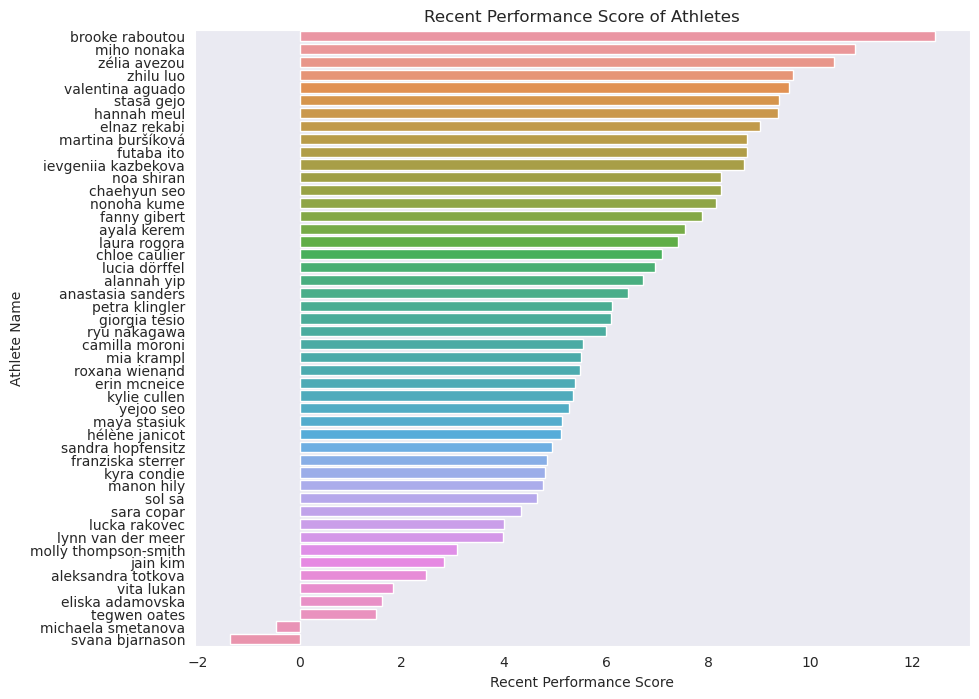

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style of the plots
sns.set_style("dark")

# Create a bar plot for the 'recent performance score'
plt.figure(figsize=(10, 8))  
sns.barplot(x='recent performance score', y='name', data=df_climbers_full_stats_2023.sort_values('recent performance score', ascending=False))

plt.title('Recent Performance Score of Athletes')  
plt.xlabel('Recent Performance Score') 
plt.ylabel('Athlete Name')  

# Show the plot
plt.show()

Here are some insights based on the sorted scores:
- Brooke Raboutou, Miho Nonaka, and Zélia Avezou lead the rankings with scores above 10, making them the top performers. This indicates exceptionally high performance across the evaluated metrics, which include podium finishes, top percentage in competitions, and efficiency in attempts per top, among others. Their scores reflect consistent excellence and likely multiple top finishes.
- Athletes like Valentina Aguado, Zhilu Luo, Stasa Gejo, and others with scores ranging from approximately 8 to 10 also demonstrate strong performances. Their scores suggest they are highly competitive and likely achieved notable placements in competitions, so we should keep an eye out. 
- Athletes with scores around 5 to 8, such as Chloe Caulier, Laura Rogora, and Ayala Kerem, show good competitiveness. While they may not consistently place at the very top, their performances are solid, indicating potential podium finishes and strong participation metrics. 
- Michaela Smetanova and Svana Bjarnason have negative scores. These negative values result from the subtraction involved in the "average attempts per top" component. A negative score indicates a high number of attempts per top, significantly impacting the overall performance score negatively. 
- The wide range of scores demonstrates the diverse levels of success and challenges athletes face in competitions.
- Negative scores highlight areas for improvement for the climbers.
- This ranking offers insights into whom the standout performers are, who is showing promise, and who might need to strategize differently for future competitions.

Let's merge their all-time results with their 2023 ones into one single DF:

In [305]:
import pandas as pd
from itables import init_notebook_mode
init_notebook_mode(all_interactive=False)

# Assuming 'name' is the common column
ultimate_stats = pd.merge(df_climbers_full_stats, df_climbers_full_stats_2023, on='name', how='inner')

# Display the merged DataFrame
ultimate_stats

<IPython.core.display.Javascript object>

name country active years career length  \
0            alannah yip     CAN    2011-2023     12+ years   
1     aleksandra totkova     BUL    2022-2023     1-2 years   
2      anastasia sanders     USA    2023-2023     1-2 years   
3            ayala kerem     ISR    2020-2023     3-5 years   
4        brooke raboutou     USA    2017-2023     6-8 years   
5         camilla moroni     ITA    2019-2023     3-5 years   
6           chaehyun seo     KOR    2019-2023     3-5 years   
7          chloe caulier     BEL    2012-2023    9-12 years   
8       eliska adamovska     CZE    2019-2023     3-5 years   
9           elnaz rekabi     IRI    2014-2023    9-12 years   
10          erin mcneice     GBR    2022-2023     1-2 years   
11          fanny gibert     FRA    2011-2023     12+ years   
12     franziska sterrer     AUT    2015-2023    9-12 years   
13            futaba ito     JPN    2018-2023     6-8 years   
14         giorgia tesio     ITA    2016-2023     6-8 years   
15           hannah meul     GER    2017-2023     6-8 years   
16        hélène janicot     FRA    2013-2023    9-12 years   
17   ievgeniia kazbekova     UKR    2012-2023    9-12 years   
18              jain kim     KOR    2008-2023     12+ years   
19          kylie cullen     USA    2021-2023     3-5 years   
20           kyra condie     USA    2013-2023    9-12 years   
21          laura rogora     ITA    2019-2023     3-5 years   
22         lucia dörffel     GER    2016-2023     6-8 years   
23         lucka rakovec     SLO    2019-2023     3-5 years   
24     lynn van der meer     NED    2021-2023     3-5 years   
25            manon hily     FRA    2014-2023    9-12 years   
26     martina buršíková     SVK    2023-2023     1-2 years   
27          maya stasiuk     AUS    2023-2023     1-2 years   
28            mia krampl     SLO    2018-2023     6-8 years   
29    michaela smetanova     CZE    2019-2023     3-5 years   
30           miho nonaka     JPN    2014-2023    9-12 years   
31  molly thompson-smith     GBR    2017-2023     6-8 years   
32            noa shiran     ISR    2020-2023     3-5 years   
33           nonoha kume     JPN    2023-2023     1-2 years   
34        petra klingler     SUI    2009-2023     12+ years   
35        roxana wienand     GER    2017-2023     6-8 years   
36          ryu nakagawa     JPN    2021-2023     3-5 years   
37     sandra hopfensitz     GER    2022-2023     1-2 years   
38            sara copar     SLO    2022-2023     1-2 years   
39                sol sa     KOR    2011-2023     12+ years   
40            stasa gejo     SRB    2013-2023    9-12 years   
41       svana bjarnason     ISL    2023-2023     1-2 years   
42          tegwen oates     RSA    2023-2023     1-2 years   
43      valentina aguado     ARG    2017-2023     6-8 years   
44            vita lukan     SLO    2017-2023     6-8 years   
45             yejoo seo     KOR    2022-2023     1-2 years   
46             zhilu luo     CHN    2022-2023     1-2 years   
47          zélia avezou     FRA    2022-2023     1-2 years   

    qualification participations  semi-final participations  \
0                             40                         20   
1                             13                          0   
2                              7                          6   
3                             19                         15   
4                             27                         19   
5                             21                         17   
6                             18                         15   
7                             59                         28   
8                             12                          2   
9                             20                          9   
10                             9                          2   
11                            60                         44   
12                            36                         18   
13                            32                  

Let's make sure this new DF contains all the all percentage columns formatted into proportions, and all the objects which will be used are converted to floats.

In [318]:
import pandas as pd
from itables import init_notebook_mode
# Initialize itables with interactive features turned off
init_notebook_mode(all_interactive=False)

# Define a function to clean and convert columns to float
def clean_and_convert_to_float(column_name):
    if ultimate_stats[column_name].dtype == object:
        ultimate_stats[column_name] = ultimate_stats[column_name].str.replace('%', '', regex=True).astype(float)

# Columns to convert to float
float_columns = [
    'top percentage',
    'average attempts per top',
    'semi-final percentage',
    'final percentage',
    'semi final percentage in 2023',
    'final percentage in 2023'
]

# Apply the data type conversions for float columns
for column in float_columns:
    clean_and_convert_to_float(column)

# Print the updated data types
print(ultimate_stats.dtypes)

<IPython.core.display.Javascript object>

name                                     object
country                                  object
active years                             object
career length                            object
qualification participations              int64
semi-final participations                 int64
final participations                      int64
semi-final percentage                   float64
final percentage                        float64
podiums                                 float64
extended podiums                        float64
1st                                     float64
2nd                                     float64
3rd                                     float64
4th                                     float64
5th                                     float64
successful tops                           int64
total attempts                            int64
top percentage                          float64
average attempts per top                float64
qualification participations in 2023    

With all this information compiled, we can go on with the project. 

The major question at the center of this investigation has been the following: 
**What variable could more accurately predict a climbers likelihood to succeed?**

What was not so clear to me at first became obvious. **A combination of variables should be my target value**. By adding a bunch of different variables together the idea is to limit the possibilities of the model favoring athletes who excel at a single variable. 

I consulted climbers & AI and we came up with what seemed like a logical new variable called Performance Rating, which would be composed of each athlete 'extended podiums','top percentage all time', 'average attempts per top all time','competition experience','semi-final percentage', 'final percentage' and 'recent performance score' with different weights. 

I conducted a [survey](https://forms.gle/e8jitDWe8W2qAjuEA) that I sent to 14 climbing area experts to get the averages of which weight should be attributed to each variable, to create the Performance Rating and these are the results: 


| Answer number        | Extended Podium | Top Percentage | Average Attempts per Top | Competition Experience | Semi-final Percentage | Finals Percentage | Recent Performance | Total |
|----------------------|-----------------|----------------|--------------------------|-----------------------|-----------------------|-------------------|--------------------|-------|
| 1                    | 40%             | 15%            | 0%                       | 5%                    | 10%                   | 20%               | 10%                | 100%  |
| 2                    | 20%             | 20%            | 13%                      | 7%                    | 7%                    | 13%               | 20%                | 100%  |
| 3                    | 20%             | 7%             | 20%                      | 7%                    | 13%                   | 20%               | 13%                | 100%  |
| 4                    | 15%             | 25%            | 15%                      | 5%                    | 5%                    | 15%               | 20%                | 100%  |
| 5                    | 11%             | 28%            | 28%                      | 11%                   | 0%                    | 6%                | 17%                | 100%  |
| 6                    | 20%             | 5%             | 15%                      | 15%                   | 0%                    | 5%                | 40%                | 100%  |
| 7                    | 13%             | 13%            | 20%                      | 20%                   | 13%                   | 7%                | 13%                | 100%  |
| 8                    | 11%             | 19%            | 19%                      | 16%                   | 8%                    | 12%               | 16%                | 100%  |
| 9                    | 10%             | 7%             | 16%                      | 22%                   | 19%                   | 15%               | 11%                | 100%  |
| 10                   | 9%              | 12%            | 6%                       | 10%                   | 10%                   | 10%               | 42%                | 100%  |
| 11                   | 15%             | 12%            | 19%                      | 12%                   | 19%                   | 8%                | 15%                | 100%  |
| 12                   | 0%              | 0%             | 20%                      | 10%                   | 20%                   | 30%               | 20%                | 100%  |
| 13                   | 3%              | 3%             | 3%                       | 23%                   | 23%                   | 23%               | 23%                | 100%  |
| 14                   | 8%              | 17%            | 8%                       | 17%                   | 0%                    | 25%               | 25%                | 100%  |
| **Total percentage** | **14%**         | **13%**        | **14%**                  | **13%**               | **11%**               | **15%**           | **20%**            | **100%** |
| **Total proportion** | **0.1400541417**| **0.1297829332**| **0.1448683243**        | **0.1276115512**      | **0.1053977415**      | **0.1487468126**  | **0.2035384956**   | **1**   |

I also decided to take the average result per variable to identify which weight to give each sub-variable. 

In [320]:
import pandas as pd

# Define the weights for each column
weights = {
    'extended podiums': 0.1400541417,
    'top percentage all time': 0.1297829332,
    'average attempts per top all time': 0.1448683243,
    'competition experience': 0.1276115512,
    'semi-final percentage': 0.1053977415,
    'final percentage' : 0.1487468126,
    'recent performance score': 0.2035384956
}

# Adjusting the calculation to treat the percentages as out of 100
df_climbers_ultimate_stats['performance rating'] = (
        df_climbers_ultimate_stats['extended podiums'] * weights['extended podiums'] +
        df_climbers_ultimate_stats['top percentage all time'] * 100 * weights['top percentage all time'] +
        df_climbers_ultimate_stats['average attempts per top all time'] * weights['average attempts per top all time'] +
        df_climbers_ultimate_stats['competition experience'] * weights['competition experience'] +
        df_climbers_ultimate_stats['semi-final percentage'] * 100 * weights['semi-final percentage'] +
        df_climbers_ultimate_stats['final percentage'] * 100 * weights['final percentage'] +
        df_climbers_ultimate_stats['recent performance score'] * weights['recent performance score']
)

# Save the modified DataFrame to the specified output file path
output_file_path = "/home/sole/Documents/DS/Projecte Final/climbers_ultimate_stats.xlsx"
df_climbers_ultimate_stats.to_excel(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

# Display the DataFrame with the new 'performance rating' column
df_climbers_ultimate_stats

DataFrame saved to /home/sole/Documents/DS/Projecte Final/climbers_ultimate_stats.xlsx


name country active years career length  \
0            alannah yip     CAN    2011-2023   12-15 years   
1     aleksandra totkova     BUL    2022-2023     1-2 years   
2      anastasia sanders     USA    2023-2023     1-2 years   
3            ayala kerem     ISR    2020-2023     3-5 years   
4        brooke raboutou     USA    2017-2023     6-8 years   
5         camilla moroni     ITA    2019-2023     3-5 years   
6           chaehyun seo     KOR    2019-2023     3-5 years   
7          chloe caulier     BEL    2012-2023    9-12 years   
8       eliska adamovska     CZE    2019-2023     3-5 years   
9           elnaz rekabi     IRI    2014-2023    9-12 years   
10          erin mcneice     GBR    2022-2023     1-2 years   
11          fanny gibert     FRA    2011-2023   12-15 years   
12     franziska sterrer     AUT    2015-2023    9-12 years   
13            futaba ito     JPN    2018-2023     6-8 years   
14         giorgia tesio     ITA    2016-2023     6-8 years   
15           hannah meul     GER    2017-2023     6-8 years   
16        hélène janicot     FRA    2013-2023    9-12 years   
17   ievgeniia kazbekova     UKR    2012-2023    9-12 years   
18              jain kim     KOR    2008-2023   12-15 years   
19          kylie cullen     USA    2021-2023     3-5 years   
20           kyra condie     USA    2013-2023    9-12 years   
21          laura rogora     ITA    2019-2023     3-5 years   
22         lucia dörffel     GER    2016-2023     6-8 years   
23         lucka rakovec     SLO    2019-2023     3-5 years   
24     lynn van der meer     NED    2021-2023     3-5 years   
25            manon hily     FRA    2014-2023    9-12 years   
26     martina buršíková     SVK    2023-2023     1-2 years   
27          maya stasiuk     AUS    2023-2023     1-2 years   
28            mia krampl     SLO    2018-2023     6-8 years   
29    michaela smetanova     CZE    2019-2023     3-5 years   
30           miho nonaka     JPN    2014-2023    9-12 years   
31  molly thompson-smith     GBR    2017-2023     6-8 years   
32            noa shiran     ISR    2020-2023     3-5 years   
33           nonoha kume     JPN    2023-2023     1-2 years   
34        petra klingler     SUI    2009-2023     12+ years   
35        roxana wienand     GER    2017-2023     6-8 years   
36          ryu nakagawa     JPN    2021-2023     3-5 years   
37     sandra hopfensitz     GER    2022-2023     1-2 years   
38            sara copar     SLO    2022-2023     1-2 years   
39                sol sa     KOR    2011-2023   12-15 years   
40            stasa gejo     SRB    2013-2023    9-12 years   
41       svana bjarnason     ISL    2023-2023     1-2 years   
42          tegwen oates     RSA    2023-2023     1-2 years   
43      valentina aguado     ARG    2017-2023     6-8 years   
44            vita lukan     SLO    2017-2023     6-8 years   
45             yejoo seo     KOR    2022-2023     1-2 years   
46             zhilu luo     CHN    2022-2023     1-2 years   
47          zélia avezou     FRA    2022-2023     1-2 years   

    competition experience  qualification participations  \
0                       40                            40   
1                       12                            13   
2                        9                             7   
3                       20                            19   
4                       30                            27   
5                       22                            21   
6                       20                            18   
7                       58                            59   
8                       11                            12   
9                       21                            20   
10                       8                             9   
11                      59                            60   
12                      35                            36   
13                      33                            32   
14                      23      

Let's take a look at the highest performance ratings, shall we?

In [322]:
# Create a copy of the selected columns to avoid SettingWithCopyWarning
df_names_ratings = df_climbers_ultimate_stats[['name', 'performance rating']].copy()

# Round the 'performance rating' to two decimal places
df_names_ratings['performance rating'] = df_names_ratings['performance rating'].round(2)

# Sort by 'performance rating' descending
df_names_ratings_sorted = df_names_ratings.sort_values(by='performance rating', ascending=False)

# Display the sorted and rounded DataFrame
print(df_names_ratings_sorted)

                    name  performance rating
30           miho nonaka               41.16
40            stasa gejo               29.97
11          fanny gibert               27.65
4        brooke raboutou               27.60
13            futaba ito               27.39
34        petra klingler               26.39
26     martina buršíková               24.43
18              jain kim               24.36
6           chaehyun seo               23.64
46             zhilu luo               23.50
2      anastasia sanders               23.43
5         camilla moroni               21.16
39                sol sa               20.75
47          zélia avezou               19.62
15           hannah meul               19.42
3            ayala kerem               19.40
7          chloe caulier               19.05
17   ievgeniia kazbekova               18.06
33           nonoha kume               17.69
0            alannah yip               16.17
23         lucka rakovec               15.76
12     fra

And let's visualize it too:

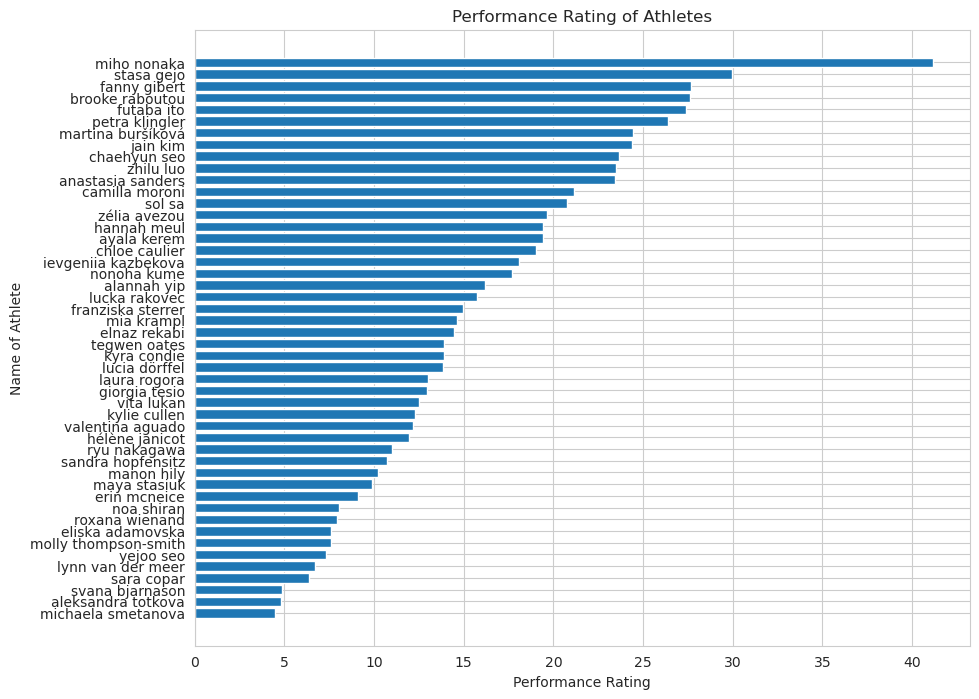

In [323]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'performance rating' to make the chart more informative
df_sorted = df_names_ratings.sort_values('performance rating', ascending=True)

# Create a bar chart
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.barh(df_sorted['name'], df_sorted['performance rating'])  # Horizontal bar chart
plt.xlabel('Performance Rating')
plt.ylabel('Name of Athlete')
plt.title('Performance Rating of Athletes')
plt.show()

The key takeaways:
- Miho Nonaka leads the list with the highest performance rating of 41.16, indicating exceptional performance. Stasa Gejo, Fanny Gibert, Brooke Raboutou, and Futaba Ito also appear at the top, suggesting these athletes have had significant success, possibly through winning competitions, achieving high placements, or consistently performing well in events.
- The middle of the list, with athletes like Anastasia Sanders, Camilla Moroni, and Sol Sa, represents consistent performers. Their ratings suggest they have had notable successes and have maintained a level of performance that keeps them competitive in their field.
- Athletes with middle to lower performance ratings but who are close to those with slightly higher ratings may have the potential to cause upsets in future competitions. Their proximity in performance rating suggests that small improvements could lead to significant changes in their competitive standings.

With these in mind, let's move on to the selection and training of 3 models and their predictions. I have chosen regressive models.

A regression model is a statistical tool used to understand the relationship between a dependent variable (target) and one or more independent variables (predictors).
Its main objective is to predict the value of the dependent variable based on the known values of the independent variables. 

To recap, my target variable will be 'performance rating' and my selected features: 'extended podiums', 'top percentage all time', 'inverted_attempts_per_top', 'competition experience', 'semi-final percentage', 'final percentage', 'recent performance score'. 

I will not give the weight I attributed to them, as to avoid data leakage. 

Now let's test 3 models by having them work with the features that make up the athlete's performance rating score according to knowledgeable climbers views on it.

After training, the models will predict the performance ratings for the entire dataset (X) to assess how each climber is expected to perform. From there, it will create a DataFrame containing each climber's name and their predicted performance rating in descending order.

Finally, the code will print the names and predicted ratings of the top 10 climbers, providing insight into which climbers the model predicts will have the highest performance ratings.

1. Random Forest Regressor: 
Random Forest Regressor is an ensemble learning method that operates by constructing a multitude of decision trees at training time and generating the average prediction of the individual trees.

It aligns well with the multifaceted and complex nature of predicting sports performance, where multiple variables and their interaction influence the final result.

In [347]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Adjust 'average attempts per top all time' so that a higher value is better
df_climbers_ultimate_stats['inverted_attempts_per_top'] = 1 / df_climbers_ultimate_stats['average attempts per top all time']

# Select features for the model and the target variable
selected_features = ['extended podiums', 'top percentage all time', 'inverted_attempts_per_top', 'competition experience', 'semi-final percentage', 'final percentage', 'recent performance score']
X = df_climbers_ultimate_stats[selected_features]
y = df_climbers_ultimate_stats['performance rating']  # target column

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model on the training set
rf_regressor.fit(X_train, y_train)

# Predict the performance ratings on the full dataset for all climbers
y_pred_full = rf_regressor.predict(X)

# Create a DataFrame with predicted ratings and climbers' names
predictions_df = pd.DataFrame({
    'name': df_climbers_ultimate_stats['name'],
    'RFR rating': y_pred_full
})

# Rank the climbers based on predicted performance ratings
predictions_df_sorted = predictions_df.sort_values(by='RFR rating', ascending=False)

# Extract the top 10 predicted climbers based on rating
RFR_prediction = predictions_df_sorted.head(20)

# Print the names and predicted ratings of the top climbers
print(RFR_prediction)

                   name  RFR rating
30          miho nonaka   35.078876
4       brooke raboutou   27.563324
11         fanny gibert   26.798975
13           futaba ito   26.787053
40           stasa gejo   26.269919
34       petra klingler   25.490121
18             jain kim   24.632626
46            zhilu luo   22.530251
2     anastasia sanders   22.109936
6          chaehyun seo   21.573666
5        camilla moroni   21.201978
47         zélia avezou   20.474075
3           ayala kerem   20.417022
39               sol sa   20.222766
15          hannah meul   19.507745
7         chloe caulier   18.798022
17  ievgeniia kazbekova   18.491940
43     valentina aguado   16.894226
26    martina buršíková   16.313720
0           alannah yip   15.496028


2. Gradient Boosting Regressor 
GradientBoostingRegressor is a machine learning model that uses gradient boosting to predict continuous values, in this case the performance score.

After training, the model predicts the performance ratings of the entire data set (X) to evaluate how each climber is expected to perform and gives us a top 10.

In [348]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Adjust 'average attempts per top all time' so that a higher value is better
df_climbers_ultimate_stats['inverted_attempts_per_top'] = 1 / df_climbers_ultimate_stats['average attempts per top all time']

# Select features for the model and the target variable
selected_features = ['extended podiums', 'top percentage all time', 'inverted_attempts_per_top', 'competition experience', 'semi-final percentage', 'final percentage', 'recent performance score']
X = df_climbers_ultimate_stats[selected_features]
y = df_climbers_ultimate_stats['performance rating']  # target column

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Train the model on the training set
gb_regressor.fit(X_train, y_train)

# Predict the performance ratings on the full dataset for all climbers
y_pred_full = gb_regressor.predict(X)

# Create a DataFrame with predicted ratings and climbers' names
predictions_df = pd.DataFrame({
    'name': df_climbers_ultimate_stats['name'],
    'GBR rating': y_pred_full
})

# Rank the climbers based on predicted performance ratings
predictions_df_sorted = predictions_df.sort_values(by='GBR rating', ascending=False)

# Extract the top 5 predicted climbers based on rating
GBR_prediction = predictions_df_sorted.head(20)

# Print the names and predicted ratings of the top climbers
print(GBR_prediction)

                   name  GBR rating
30          miho nonaka   41.155653
4       brooke raboutou   33.345358
11         fanny gibert   27.630007
40           stasa gejo   27.575056
13           futaba ito   27.389159
34       petra klingler   26.375812
18             jain kim   24.349482
46            zhilu luo   23.539050
2     anastasia sanders   23.422695
6          chaehyun seo   22.777246
39               sol sa   21.467753
3           ayala kerem   21.309966
5        camilla moroni   21.193604
47         zélia avezou   19.588945
15          hannah meul   19.390526
7         chloe caulier   19.054754
43     valentina aguado   18.108373
17  ievgeniia kazbekova   18.105540
0           alannah yip   16.146938
26    martina buršíková   16.117636


3. XGBoost
And finally, XGBoost, I discovered this model when looking for which models could be most effective for this project.

GBRegressor has accuracy, robustness, and the ability to handle complexities and variations in data.

In [349]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd

# Adjust 'average attempts per top all time' so that a higher value is better
df_climbers_ultimate_stats['inverted_attempts_per_top'] = 1 / df_climbers_ultimate_stats['average attempts per top all time']

# Select features for the model and the target variable
selected_features = ['extended podiums', 'top percentage all time', 'inverted_attempts_per_top', 'competition experience', 'semi-final percentage', 'final percentage', 'recent performance score']
X = df_climbers_ultimate_stats[selected_features]
y = df_climbers_ultimate_stats['performance rating']  # target column

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                                 max_depth = 5, alpha = 10, n_estimators = 100, random_state=42)  # Example hyperparameters

# Train the model on the training set
xgb_regressor.fit(X_train, y_train)

# Predict the performance ratings on the full dataset for all climbers
y_pred_full = xgb_regressor.predict(X)

# Create a DataFrame with predicted ratings and climbers' names
predictions_df = pd.DataFrame({
    'name': df_climbers_ultimate_stats['name'],
    'XGBoost': y_pred_full
})

# Rank the climbers based on predicted performance ratings
predictions_df_sorted = predictions_df.sort_values(by='XGBoost', ascending=False)

# Extract the top 10 predicted climbers based on rating
XGB_prediction = predictions_df_sorted.head(20)

# Print the names and predicted ratings of the top climbers
print(XGB_prediction)

                   name    XGBoost
30          miho nonaka  30.985245
13           futaba ito  27.690512
11         fanny gibert  27.654451
40           stasa gejo  27.009560
34       petra klingler  26.322090
4       brooke raboutou  25.830250
18             jain kim  24.308205
46            zhilu luo  23.828783
2     anastasia sanders  23.216169
6          chaehyun seo  22.259272
5        camilla moroni  21.069736
3           ayala kerem  20.558823
33          nonoha kume  20.518675
39               sol sa  20.174303
26    martina buršíková  19.824434
47         zélia avezou  19.454775
15          hannah meul  19.156464
7         chloe caulier  18.830957
17  ievgeniia kazbekova  18.234209
0           alannah yip  16.197926


Let's view these results side by side: 

| name              | performance rating | RFR rating | GBR rating | XGB rating |
|-------------------|-------------------:|-----------:|-----------:|-----------:|
| Miho Nonaka       |              41.16 |    35.0789 |    41.1557 |    30.9852 |
| Stasa Gejo        |              29.97 |    26.2699 |    27.5751 |    27.0096 |
| Fanny Gibert      |              27.65 |    26.7989 |    27.6300 |    27.6545 |
| Brooke Raboutou   |              27.60 |    27.5633 |    33.3454 |    25.8302 |
| Futaba Ito        |              27.39 |    26.7870 |    27.3892 |    27.6905 |
| Petra Klingler    |              26.39 |    25.4901 |    26.3758 |    26.3221 |
| Martina Buršíková |              24.43 |    16.3137 |    16.1176 |    19.8244 |
| Jain Kim          |              24.36 |    24.6326 |    24.3495 |    24.3082 |
| Chaehyun Seo      |              23.64 |    21.5737 |    22.7772 |    22.2593 |
| Zhilu Luo         |              23.50 |    22.5303 |    23.5391 |    23.8288 |
| Anastasia Sanders |              23.43 |    22.1099 |    23.4227 |    23.2162 |
| Camilla Moroni    |              21.16 |    21.2020 |    21.1936 |    21.0697 |
| Sol Sa            |              20.75 |    20.2228 |    21.4678 |    20.1743 |
| Zélia Avezou      |              19.62 |    20.4741 |    19.5890 |    19.4548 |
| Hannah Meul       |              19.42 |    19.5077 |    19.3905 |    19.1565 |
| Ayala Kerem       |              19.40 |    20.4170 |    21.3100 |    20.5588 |
| Chloe Caulier     |              19.05 |    18.7980 |    19.0548 |    18.8310 |
| Ievgeniia Kazbekova|             18.06 |    18.4920 |    18.1055 |    18.2342 |
| Nonoha Kume       |              17.69 |    15.0059 |    14.7736 |    20.5187 |
| Alannah Yip       |              16.17 |    15.4960 |    16.1469 |    16.1979 |

Insights from the models predictions:
- All three models predict similar ratings for an athlete and these ratings closely match the actual performance rating, this suggests a strong agreement and confidence in the athlete's assessed performance level. A high degree of similarity also indicates that the features used for modeling effectively capture the factors influencing performance.

- Variations in the ratings predicted by different models can highlight differences in how each model processes and weighs the input features. Discrepancies may suggest that some models are capturing aspects of the data that others are not, which could be due to overfitting, underfitting, or the inherent biases and strengths of each model.

Comparison to the target 'performance rating':
- when a model's rating closely matches the actual performance rating, it suggests that the model has effectively learned the underlying patterns and can accurately predict performance.
- if a model consistently overestimates or underestimates the performance ratings, it might indicate bias in the model or missing explanatory variables that could improve its accuracy.
- athletes with consistently high ratings across models and close to their performance rating are likely top performers with stable outcomes.

Model Evaluation:
To evaluate my models I have used MAE, MSE, RMSE, and \(R^2\) score because these metrics evaluate the precision of the predictions with respect to the real values, adapting them for continuous objectives. 

In [350]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to evaluate the model
def evaluate_model(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R^2 Score': r2
    }

# Assuming you have models named as follows: gb_regressor, rf_regressor, xgb_regressor
models = {
    'Gradient Boosting Regressor': gb_regressor,
    'Random Forest Regressor': rf_regressor,
    'XGBoost Regressor': xgb_regressor
}

# Evaluate each model
results = [evaluate_model(name, model, X_test, y_test) for name, model in models.items()]

# Convert the results into a DataFrame for nice formatting
import pandas as pd
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                         Model       MAE        MSE      RMSE  R^2 Score
0  Gradient Boosting Regressor  2.379115  11.034377  3.321803   0.786831
1      Random Forest Regressor  1.999732   8.322435  2.884863   0.839222
2            XGBoost Regressor  1.490171   3.615440  1.901431   0.930155


Key takeaway: XGBoost has surpassed Random Forest and Gradient Boosting in precision, with lower MAE and RMSE and higher \(R^2\) score, showing that it makes accurate predictions and good generalization.

Cross validation: 

In [351]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np

# Suponiendo que X e y son tus características y etiquetas respectivamente
X = df_climbers_ultimate_stats[selected_features]
y = df_climbers_ultimate_stats['performance rating']

# Configura el método K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lista para guardar los modelos
models = {
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
}

# Ejecuta la validación cruzada para cada modelo
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)

    print(f"{name}: RMSE average: {np.mean(rmse_scores):.2f}, with standard deviation: {np.std(rmse_scores):.2f}")

Random Forest Regressor: RMSE average: 2.49, with standard deviation: 1.35
Gradient Boosting Regressor: RMSE average: 2.56, with standard deviation: 0.93
XGBoost Regressor: RMSE average: 2.85, with standard deviation: 1.48


From the cross-validation, we see that Random Forest is the most accurate of the models but varies more, while Gradient Boosting is more consistent, ideal for seeking stability in predictions.

I think prioritizing consistency is key for this project, seeking a balance between precision and reliability.

| name            | performance rating | GBR rating |
|-----------------|-------------------:|-----------:|
| Miho Nonaka     |              41.16 |    41.1557 |
| Stasa Gejo      |              29.97 |    27.5751 |
| Fanny Gibert    |              27.65 |    27.6300 |
| Brooke Raboutou |              27.60 |    33.3454 |
| Futaba Ito      |              27.39 |    27.3892 |

This is the prediction of the model that has obtained the best results, as you can see, it is not the same order as that given by the performance rating but nevertheless we see the same climbers.

Personally, I feel very satisfied with the results obtained.

However, I am aware of some of the limitations of this project such as:
- Predicting sports performance with Machine Learning is complex due to the changing and multifaceted nature of sport.
- Limitations include variability in athlete form, injuries, psychological status, and unforeseen external circumstances. The human element, such as strategic decisions and resilience, adds an unpredictable dimension to the models.
- In addition, the project faces specific challenges such as the small size of the data set, bias in the selection of features, and the lack of time to be able to use the model in the past or for the outcome of men, for example.
- It is worth remembering that this project has recreational and educational purposes only.

What's next for this project?
- See who wins on May 19, 2024, to confirm the reliability of the model and adjust it.
- Depending on the outcome, reevaluate the weight and even the variables used in the Performance Rating.
- Use the model to predict new outcomes in the future, such as the winner of the Olympic Games.
- If reliable, contact the athletes' coaches to see if they want personalized in-depth performance analysis.

And for you? Well, I hope you enjoy watching the Olympic games this summer 2024 and get a glimpse at the bouldering discipline!

The presentation version of this project, with interactive graphs will be found: [here](https://www.canva.com/design/DAF7i7UZWds/RbbPpgspsZ8LlLLEwGfVtw/view?utm_content=DAF7i7UZWds&utm_campaign=designshare&utm_medium=link&utm_source=editor)

This was Analyzing Female Bouldering Results in Climbing Competitions for Olympic Qualification Predictions, I am Maria Soledad, thank you for your time!